# Машинное обучение, ФКН ВШЭ

## Практическое задание 3. Градиентный спуск своими руками

### Общая информация
Дата выдачи: **01.11.2024**

Мягкий дедлайн: **13.11.24 23:59**

Жесткий дедлайн: **15.11.24 23:59**

### О задании

В данном задании необходимо реализовать обучение линейной регрессии с помощью различных вариантов градиентного спуска.


### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов + 2 балла бонус.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.
Также оценка может быть снижена за плохо читаемый код и плохо считываемые диаграммы.

Все ответы должны сопровождаться кодом или комментариями о том, как они были получены.


### Формат сдачи
Задания сдаются через систему Anytask. Инвайт можно найти на странице курса. Присылать необходимо ноутбук с выполненным заданием. Сам ноутбук называйте в формате homework-practice-03-gd-Username.ipynb, где Username — ваша фамилия.

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже.

**Оценка**: ...

Напомним, что на лекциях и семинарах мы разбирали некоторые подходы к оптимизации функционалов по параметрам. В частности, был рассмотрен градиентный спуск и различные подходы к его реализации — полный градиентный спуск, стохастический градиентный спуск, метод импульса и другие. В качестве модели у нас будет выступать линейная регрессия.

В этом домашнем задании вам предстоит реализовать 4 различных вариации градиентного спуска, написать свою реализацию линейной регресии, сравнить методы градиентного спуска между собой на реальных данных и ещё много чего веселого и интересного!

## Задание 1. Реализация градиентного спуска (3.5 балла)

В этом задании вам предстоит написать собственные реализации различных подходов к градиентному спуску с опорой на подготовленные шаблоны в файле `descents.py`.

**Все реализуемые методы должны быть векторизованы!**

### Лирическое-теоретическое отступление № 1

Основное свойство антиградиента &ndash; он указывает в сторону наискорейшего убывания функции в данной точке. Соответственно, будет логично стартовать из некоторой точки, сдвинуться в сторону антиградиента,
пересчитать антиградиент и снова сдвинуться в его сторону и т.д. Запишем это более формально.

Пусть $w_0$ &ndash; начальный набор параметров (например, нулевой или сгенерированный из некоторого
случайного распределения). Тогда ванильный градиентный спуск состоит в повторении следующих шагов до сходимости:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

### Лирическое-теоретическое отступление № 2

На семинаре про [матрично-векторное дифференцирование](https://github.com/esokolov/ml-course-hse/blob/master/2022-fall/seminars/sem03-vector-diff.pdf) вы должны были обсуждать дифференцирование функции потерь MSE в матричном виде.

### Задание 1.0. Градиент MSE в матричном виде (0.02 балла).

Напомним, что функция потерь MSE записывается в матричном виде как:

$$
    Q(w) = \dfrac{1}{\ell} \left( y - Xw \right)^T \left( y - Xw \right)
$$

Выпишите ниже (подсмотрев в семинар или решив самостоятельно) градиент для функции потерь MSE в матричном виде.

Найдем дифференциал:
$$dQ(w)[h] = d\left[ \dfrac{1}{\ell} \left( y - Xw \right)^T \left( y - Xw \right) \right][h] = \dfrac{1}{\ell} tr\left[ d \left( y - Xw \right)^T \left( y - Xw \right) [h] \right] = \dfrac{1}{\ell} tr\left[  - X^T [h^T] \left( y - Xw \right)  -  \left( y - Xw \right)^T  X [h] \right] = - \dfrac{1}{\ell} tr\left[   \left( y - Xw \right)^T X [h]  +  \left( y - Xw \right)^T  X [h] \right] = - \dfrac{1}{\ell} tr\left[ 2 \left( y - Xw \right)^T X [h] \right] =  - \dfrac{1}{\ell} <2X^T  \left( y - Xw \right), h> =  <- 2\dfrac{1}{\ell} X^T  \left( y - Xw \right), h> $$
Из этого:
$$\nabla_w Q(w) = - 2\dfrac{1}{\ell} X^T  \left( y - Xw \right)$$

### Задание 1.1. Родительский класс BaseDescent (0.5 балла).

Реализуйте функции `calc_loss` (вычисление MSE для переданных $x$ и $y$) и `predict` (предсказание $y_{pred}$ для переданных $x$) в классе `BaseDescent`.

Все вычисления должны быть векторизованы.

### Задание 1.2. Полный градиентный спуск VanillaGradientDescent (0.5 балла).

Реализуйте полный градиентный спуск заполнив пропуски в классе `VanillaGradientDescent` в файле `descents.py`. Для вычисления градиента используйте формулу выше. Шаг оптимизации:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

Здесь и далее функция `update_weights` должна возвращать разницу между $w_{k + 1}$ и $w_{k}$: $\quad w_{k + 1} - w_{k} = -\eta_{k} \nabla_{w} Q(w_{k})$. Кроме того, соответственно своему названию, она должна обновлять веса.

Во всех методах градиентного спуска мы будем использовать следующую формулу для длины шага:

$$
    \eta_{k} = \lambda \left(\dfrac{s_0}{s_0 + k}\right)^p
$$

На практике достаточно настроить параметр $\lambda$, а остальным выставить параметры по умолчанию: $s_0 = 1, \, p = 0.5.$

### Лирическое-теоретическое отступление № 3

Как правило, в задачах машинного обучения функционал $Q(w)$ представим в виде суммы $\ell$ функций:

$$
    Q(w)
    =
    \frac{1}{\ell}
    \sum_{i = 1}^{\ell}
        q_i(w).
$$

В нашем домашнем задании отдельные функции $q_i(w)$ соответствуют ошибкам на отдельных объектах.

Проблема метода градиентного спуска состоит в том, что на каждом шаге необходимо вычислять градиент всей суммы (будем его называть полным градиентом):

$$
    \nabla_w Q(w)
    =
    \frac{1}{\ell}
    \sum_{i = 1}^{\ell}
        \nabla_w q_i(w).
$$

Это может быть очень трудоёмко при больших размерах выборки. В то же время точное вычисление градиента может быть не так уж необходимо &ndash; как правило, мы делаем не очень большие шаги в сторону антиградиента, и наличие в нём неточностей не должно сильно сказаться на общей траектории.

Оценить градиент суммы функций можно средним градиентов случайно взятого подмножества функций:

$$
    \nabla_{w} Q(w_{k}) \approx \dfrac{1}{|B|}\sum\limits_{i \in B}\nabla_{w} q_{i}(w_{k}),
$$
где $B$ - это случайно выбранное подмножество индексов.

В этом случае мы получим метод **стохастического градиентного спуска**.

### Задание 1.3. Стохастический градиентный спуск StochasticDescent (0.5 балла).

Реализуйте стохастический градиентный спуск заполнив пропуски в классе `StochasticDescent`. Для оценки градиента используйте формулу выше (среднее градиентов случайно выбранного батча объектов). Шаг оптимизации:

$$
    w_{k + 1} = w_{k} - \eta_{k} \dfrac{1}{|B|}\sum\limits_{i \in B}\nabla_{w} q_{i}(w_{k}).
$$

Размер батча будет являться гиперпараметром метода, семплируйте индексы для батча объектов с помощью `np.random.randint`.

### Лирическое-теоретическое отступление № 4

Может оказаться, что направление антиградиента сильно меняется от шага к шагу. Например, если линии уровня функционала сильно вытянуты, то из-за ортогональности градиента линиям уровня он будет менять направление на почти противоположное на каждом шаге. Такие осцилляции будут вносить сильный шум в движение, и процесс оптимизации займёт много итераций. Чтобы избежать этого, можно усреднять векторы антиградиента с нескольких предыдущих шагов &ndash; в этом случае шум уменьшится, и такой средний вектор будет указывать в сторону общего направления движения. Введём для этого вектор инерции:

\begin{align}
    &h_0 = 0, \\
    &h_{k + 1} = \alpha h_{k} + \eta_k \nabla_w Q(w_{k})
\end{align}

Здесь $\alpha$ &ndash; параметр метода, определяющей скорость затухания градиентов с предыдущих шагов. Разумеется, вместо вектора градиента может быть использована его аппроксимация. Чтобы сделать шаг градиентного спуска, просто сдвинем предыдущую точку на вектор инерции:

$$
    w_{k + 1} = w_{k} - h_{k + 1}.
$$

Заметим, что если по какой-то координате градиент постоянно меняет знак, то в результате усреднения градиентов в векторе инерции эта координата окажется близкой к нулю. Если же по координате знак градиента всегда одинаковый, то величина соответствующей координаты в векторе инерции будет большой, и мы будем делать большие шаги в соответствующем направлении.

### Задание 1.4 Метод Momentum MomentumDescent (0.5 балла).

Реализуйте градиентный спуск с методом инерции заполнив пропуски в классе `MomentumDescent`. Шаг оптимизации:

\begin{align}
    &h_0 = 0, \\
    &h_{k + 1} = \alpha h_{k} + \eta_k \nabla_w Q(w_{k}) \\
    &w_{k + 1} = w_{k} - h_{k + 1}.
\end{align}

$\alpha$ будет являться гиперпараметром метода, но в данном домашнем задании мы зафиксируем её за вас $\alpha = 0.9$.

### Лирическое-теоретическое отступление № 5

Градиентный спуск очень чувствителен к выбору длины шага. Если шаг большой, то есть риск, что мы будем перескакивать через точку минимума; если же шаг маленький, то для нахождения минимума потребуется много итераций. При этом нет способов заранее определить правильный размер шага &ndash; к тому же, схемы с постепенным уменьшением шага по мере итераций могут тоже плохо работать.

В методе AdaGrad предлагается сделать свою длину шага для каждой компоненты вектора параметров. При этом шаг будет тем меньше, чем более длинные шаги мы делали на предыдущих итерациях:

\begin{align}
    &G_{kj} = G_{k-1,j} + (\nabla_w Q(w_{k - 1}))_j^2; \\
    &w_{jk} = w_{j,k-1} - \frac{\eta_t}{\sqrt{G_{kj}} + \varepsilon} (\nabla_w Q(w_{k - 1}))_j.
\end{align}

Здесь $\varepsilon$ небольшая константа, которая предотвращает деление на ноль.

В данном методе можно зафксировать длину шага (например, $\eta_k = 0.01$) и не подбирать её в процессе обучения **(обратите внимание, что в данном домашнем задании длина шага не фиксируется)**. Отметим, что данный метод подходит для разреженных задач, в которых у каждого объекта большинство признаков равны нулю. Для признаков, у которых ненулевые значения встречаются редко, будут делаться большие шаги; если же какой-то признак часто является ненулевым, то шаги по нему будут небольшими.

У метода AdaGrad есть большой недостаток: переменная $G_{kj}$ монотонно растёт, из-за чего шаги становятся всё медленнее и могут остановиться ещё до того, как достигнут минимум функционала. Проблема решается в методе RMSprop, где используется экспоненциальное затухание градиентов:

$$
    G_{kj} = \alpha G_{k-1,j} + (1 - \alpha) (\nabla_w Q(w^{(k-1)}))_j^2.
$$

В этом случае размер шага по координате зависит в основном от того, насколько
быстро мы двигались по ней на последних итерациях.

Можно объединить идеи описанных выше методов: накапливать градиенты со всех прошлых шагов для
избежания осцилляций и делать адаптивную длину шага по каждому параметру.

### Задание 1.5. Метод Adam (Adaptive Moment Estimation) (1.5 балла).

Реализуйте градиентный спуск с методом Adam заполнив пропуски в классе `Adam`. Шаг оптимизации:

\begin{align}
    &m_0 = 0, \quad v_0 = 0; \\ \\
    &m_{k + 1} = \beta_1 m_k + (1 - \beta_1) \nabla_w Q(w_{k}); \\ \\
    &v_{k + 1} = \beta_2 v_k + (1 - \beta_2) \left(\nabla_w Q(w_{k})\right)^2; \\ \\
    &\widehat{m}_{k} = \dfrac{m_k}{1 - \beta_1^{k}}, \quad \widehat{v}_{k} = \dfrac{v_k}{1 - \beta_2^{k}}; \\ \\
    &w_{k + 1} = w_{k} - \dfrac{\eta_k}{\sqrt{\widehat{v}_{k + 1}} + \varepsilon} \widehat{m}_{k + 1}.
\end{align}

$\beta_1 = 0.9, \beta_2 = 0.999$ и $\varepsilon = 10^{-8}$ будут зафиксированы за вас.

## Задание 2. Реализация линейной регресии (0.5 балла)

В этом задании вам предстоит написать свою реализацию линейной регресии, обучаемой с использованием градиентного спуска, с опорой на подготовленные шаблоны в файле `linear_regression.py` - **LinearRegression**. По сути линейная регрессия будет оберткой, которая запускает обучение

Необходимо соблюдать следующие условия:

* Все вычисления должны быть векторизованы;
* Циклы средствами python допускаются только для итераций градиентного спуска;
* В качестве критерия останова необходимо использовать (одновременно):
    * Квадрат евклидовой нормы разности весов на двух соседних итерациях меньше `tolerance`;
    * Разность весов содержит наны;
    * Достижение максимального числа итераций `max_iter`.
* Будем считать, что все данные, которые поступают на вход имеют столбец единичек последним столбцом;
* Веса модели надо обновлять внутри функции `update_weights`, она неспроста так называется
* Чтобы проследить за сходимостью оптимизационного процесса будем использовать `loss_history`, в нём будем хранить значения функции потерь до каждого шага, начиная с нулевого (до первого шага по антиградиенту) и значение функции потерь после оптимизации.

## Задание 3. Проверка кода (0 баллов)

In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

import numpy as np

from descents import get_descent
from linear_regression import LinearRegression

In [3]:
num_objects = 100
dimension = 5

x = np.random.rand(num_objects, dimension)
y = np.random.rand(num_objects)

In [4]:
# Descents

descent_config = {
    'descent_name': 'some name that we will replace in the future',
    'kwargs': {
        'dimension': dimension
    }
}

for descent_name in ['full', 'stochastic', 'momentum', 'adam']:
    descent_config['descent_name'] = descent_name
    descent = get_descent(descent_config)

    diff = descent.step(x, y)
    gradient = descent.calc_gradient(x, y)
    predictions = descent.predict(x)

    assert gradient.shape[0] == dimension, f'Gradient failed for descent {descent_name}'
    assert diff.shape[0] == dimension, f'Weights failed for descent {descent_name}'
    assert predictions.shape == y.shape, f'Prediction failed for descent {descent_name}'

In [5]:
# LinearRegression

max_iter = 10
tolerance = 0

descent_config = {
    'descent_name': 'stochastic',
    'kwargs': {
        'dimension': dimension,
        'batch_size': 10
    }
}

regression = LinearRegression(
    descent_config=descent_config,
    tolerance=tolerance,
    max_iter=max_iter
)

regression.fit(x, y)

assert len(regression.loss_history) == max_iter + 1, 'Loss history failed'

Если ваше решение прошло все тесты локально, то теперь пришло время протестировать его в [Яндекс Контесте](https://contest.yandex.ru/contest/70588/).

Для каждой задачи из контеста вставьте ссылку на успешную посылку:

* **VanillaGradientDescent**: https://contest.yandex.ru/contest/70588/run-report/124599111/


* **StochasticDescent**: https://contest.yandex.ru/contest/70588/run-report/124599120/


* **MomentumDescent**: https://contest.yandex.ru/contest/70588/run-report/124599146/


* **Adam**: https://contest.yandex.ru/contest/70588/run-report/124599383/


* **LinearRegression**: https://contest.yandex.ru/contest/70588/run-report/124599853/

## Задание 4. Работа с данными (1 балл)

Мы будем использовать датасет объявлений по продаже машин на немецком Ebay. В задаче предсказания целевой переменной для нас будет являться цена.

* Постройте график распределения целевой переменной в данных, подумайте, нужно ли заменить её на логарифм. Присутствуют ли выбросы в данных с аномальной ценой? Если да, то удалите их из данных.

* Проведите исследование данных:
    * Проанализируйте тип столбцов, постройте графики зависимости целевой переменной от признака, распределения значений признака;
    * Подумайте (и напишите): какие признаки могут быть полезными на основе этих графиков, обработайте выбросы;
    * Подумайте (и напишите): какие трансформации признаков из известных вам будет уместно применить;
    * Разделите полезные признаки на категориальные, вещественные и те, которые не надо предобрабатывать.
* Разделите данные на обучающую, валидационную и тестовую выборки в отношении 8:1:1.

In [6]:
import numpy as np
import pandas as pd  # при желании, можете заменить на polars/pyspark или что угодно, что вам нравится

import matplotlib.pyplot as plt
import seaborn as sns

from descents import get_descent
from linear_regression import LinearRegression

sns.set(style='darkgrid')

In [7]:
data = pd.read_csv('autos.csv')  # разумеется, если вы используете не pandas, это надо поменять

In [8]:
data.head()

,brand,model,vehicleType,gearbox,fuelType,notRepairedDamage,powerPS,kilometer,autoAgeMonths,price
0,volkswagen,golf,kleinwagen,manuell,benzin,nein,75,150000,177.0,1500.0
1,skoda,fabia,kleinwagen,manuell,diesel,nein,69,90000,93.0,3600.0
2,bmw,3er,limousine,manuell,benzin,ja,102,150000,246.0,650.0
3,peugeot,2_reihe,cabrio,manuell,benzin,nein,109,150000,140.0,2200.0
4,mazda,3_reihe,limousine,manuell,benzin,nein,105,150000,136.0,2000.0


In [9]:
data['brand'].unique() # Тут и далее аналогично посмотрим, вообще какие значения есть

array(['volkswagen', 'skoda', 'bmw', 'peugeot', 'mazda', 'nissan',
       'renault', 'ford', 'mercedes_benz', 'honda', 'fiat', 'mini',
       'smart', 'audi', 'alfa_romeo', 'subaru', 'mitsubishi', 'hyundai',
       'opel', 'seat', 'lancia', 'porsche', 'citroen', 'toyota', 'kia',
       'chevrolet', 'dacia', 'suzuki', 'daihatsu', 'chrysler', 'volvo',
       'jaguar', 'rover', 'jeep', 'saab', 'daewoo', 'land_rover', 'lada'],
      dtype=object)

In [10]:
data['model'].unique()

array(['golf', 'fabia', '3er', '2_reihe', '3_reihe', 'passat', 'navara',
       'twingo', 'c_max', 'a_klasse', 'scirocco', '5er', 'andere',
       'civic', 'punto', 'e_klasse', 'one', 'clio', '1er', 'b_klasse',
       'fortwo', 'a8', 'jetta', 'c_klasse', 'micra', 'vito', 'sprinter',
       '156', 'escort', 'forester', 'fiesta', 'scenic', 'a1', 'focus',
       'tt', 'astra', 'a6', 'jazz', 'transporter', 'polo', 'slk', '7er',
       'combo', '80', '147', 'glk', 'z_reihe', 'ibiza', 'mustang', 'eos',
       'a4', 'touran', 'getz', 'insignia', 'megane', 'a3', 'r19', 'colt',
       'corsa', 'vectra', 'lupo', 'berlingo', 'm_klasse', 'tiguan',
       '6_reihe', 'c4', 'panda', 'up', 'i_reihe', 'ceed', 'kangoo',
       '5_reihe', 'yeti', 'octavia', 'zafira', 'mii', 'rx_reihe',
       'mondeo', '6er', 'fox', 'matiz', 'beetle', 'rio', 'touareg',
       'logan', 'omega', 'cuore', 's_max', 'modus', 'a2', 'x_reihe', 'a5',
       'galaxy', 'c3', 'viano', 's_klasse', 'sharan', 'avensis', 'sl',
       '

In [11]:
data['vehicleType'].unique()

array(['kleinwagen', 'limousine', 'cabrio', 'kombi', 'suv', 'bus',
       'coupe', 'andere'], dtype=object)

In [12]:
data['gearbox'].unique()

array(['manuell', 'automatik'], dtype=object)

In [13]:
data['fuelType'].unique() # Помимо просмотра, видим, что есть Nan значения. Сразу их выкинем.

array(['benzin', 'diesel', 'lpg', 'andere', 'hybrid', 'cng', 'elektro'],
      dtype=object)

In [14]:
data = data.dropna()

Text(0, 0.5, 'Количество')

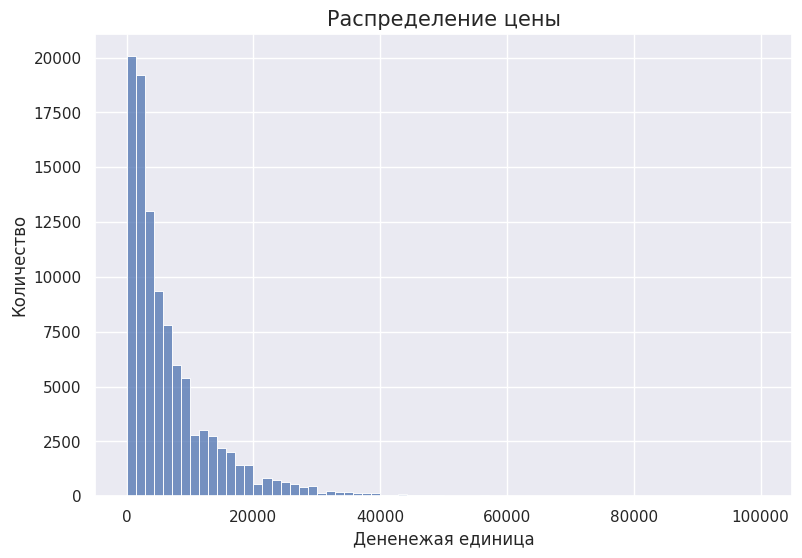

In [15]:
fig, ax = plt.subplots(figsize=(9, 6))
ax.set_title('Распределение цены', fontsize=15)
sns.histplot(data['price'], ax = ax, bins = 70)
ax.set_xlabel('Дененежая единица')
ax.set_ylabel('Количество')


Пока сложно рассуждать про выбросы. Посмотрим на график логарифма.

Text(0, 0.5, 'Количество')

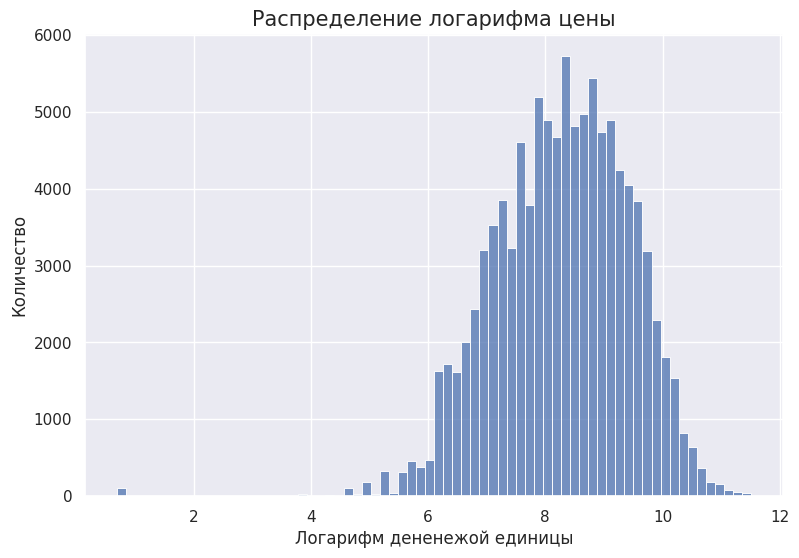

In [16]:
fig, ax = plt.subplots(figsize=(9, 6))
ax.set_title('Распределение логарифма цены', fontsize=15)
sns.histplot(np.log1p(data['price']), ax = ax, bins = 70)
ax.set_xlabel('Логарифм дененежой единицы')
ax.set_ylabel('Количество')


Как мы видим, логарифм цены похож на нормальное распределение. Предполагаю, использовать логарифм будет лучше. В таком случае за счет того, что мы будем пытаться предсказать именно порядок, а не конкретное число, мы сможем снизить переобучение. Это связано, что на рынке автомобилей редко можно найти два идентичных лота и цена сильно варьируется даже от времени открытия торгов (Во Владивостоке по крайней мере сильно зависит, как в Германии не уверен, но предполагаю, что тоже). Помимо всего, обнаруживаются аномально малые значения. Введем логарифм как целевую и выкинем выбросы.

Text(0, 0.5, 'Количество')

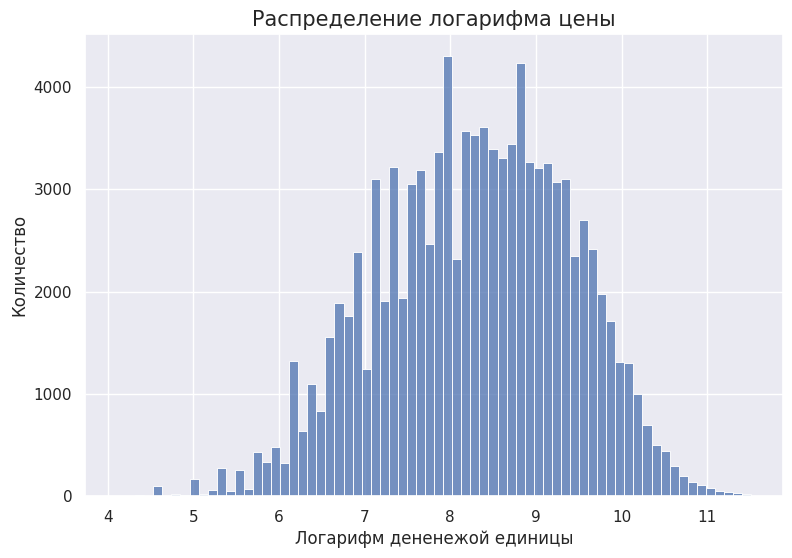

In [17]:
data['log_price'] = np.log1p(data['price'])
data = data[data['log_price'] > 4]
fig, ax = plt.subplots(figsize=(9, 6))
ax.set_title('Распределение логарифма цены', fontsize=15)
sns.histplot(data['log_price'], ax = ax, bins = 70)
ax.set_xlabel('Логарифм дененежой единицы')
ax.set_ylabel('Количество')

Далее пройдемся по признакам. Посмотрим на их распределение и связь с ценой автомобиля.

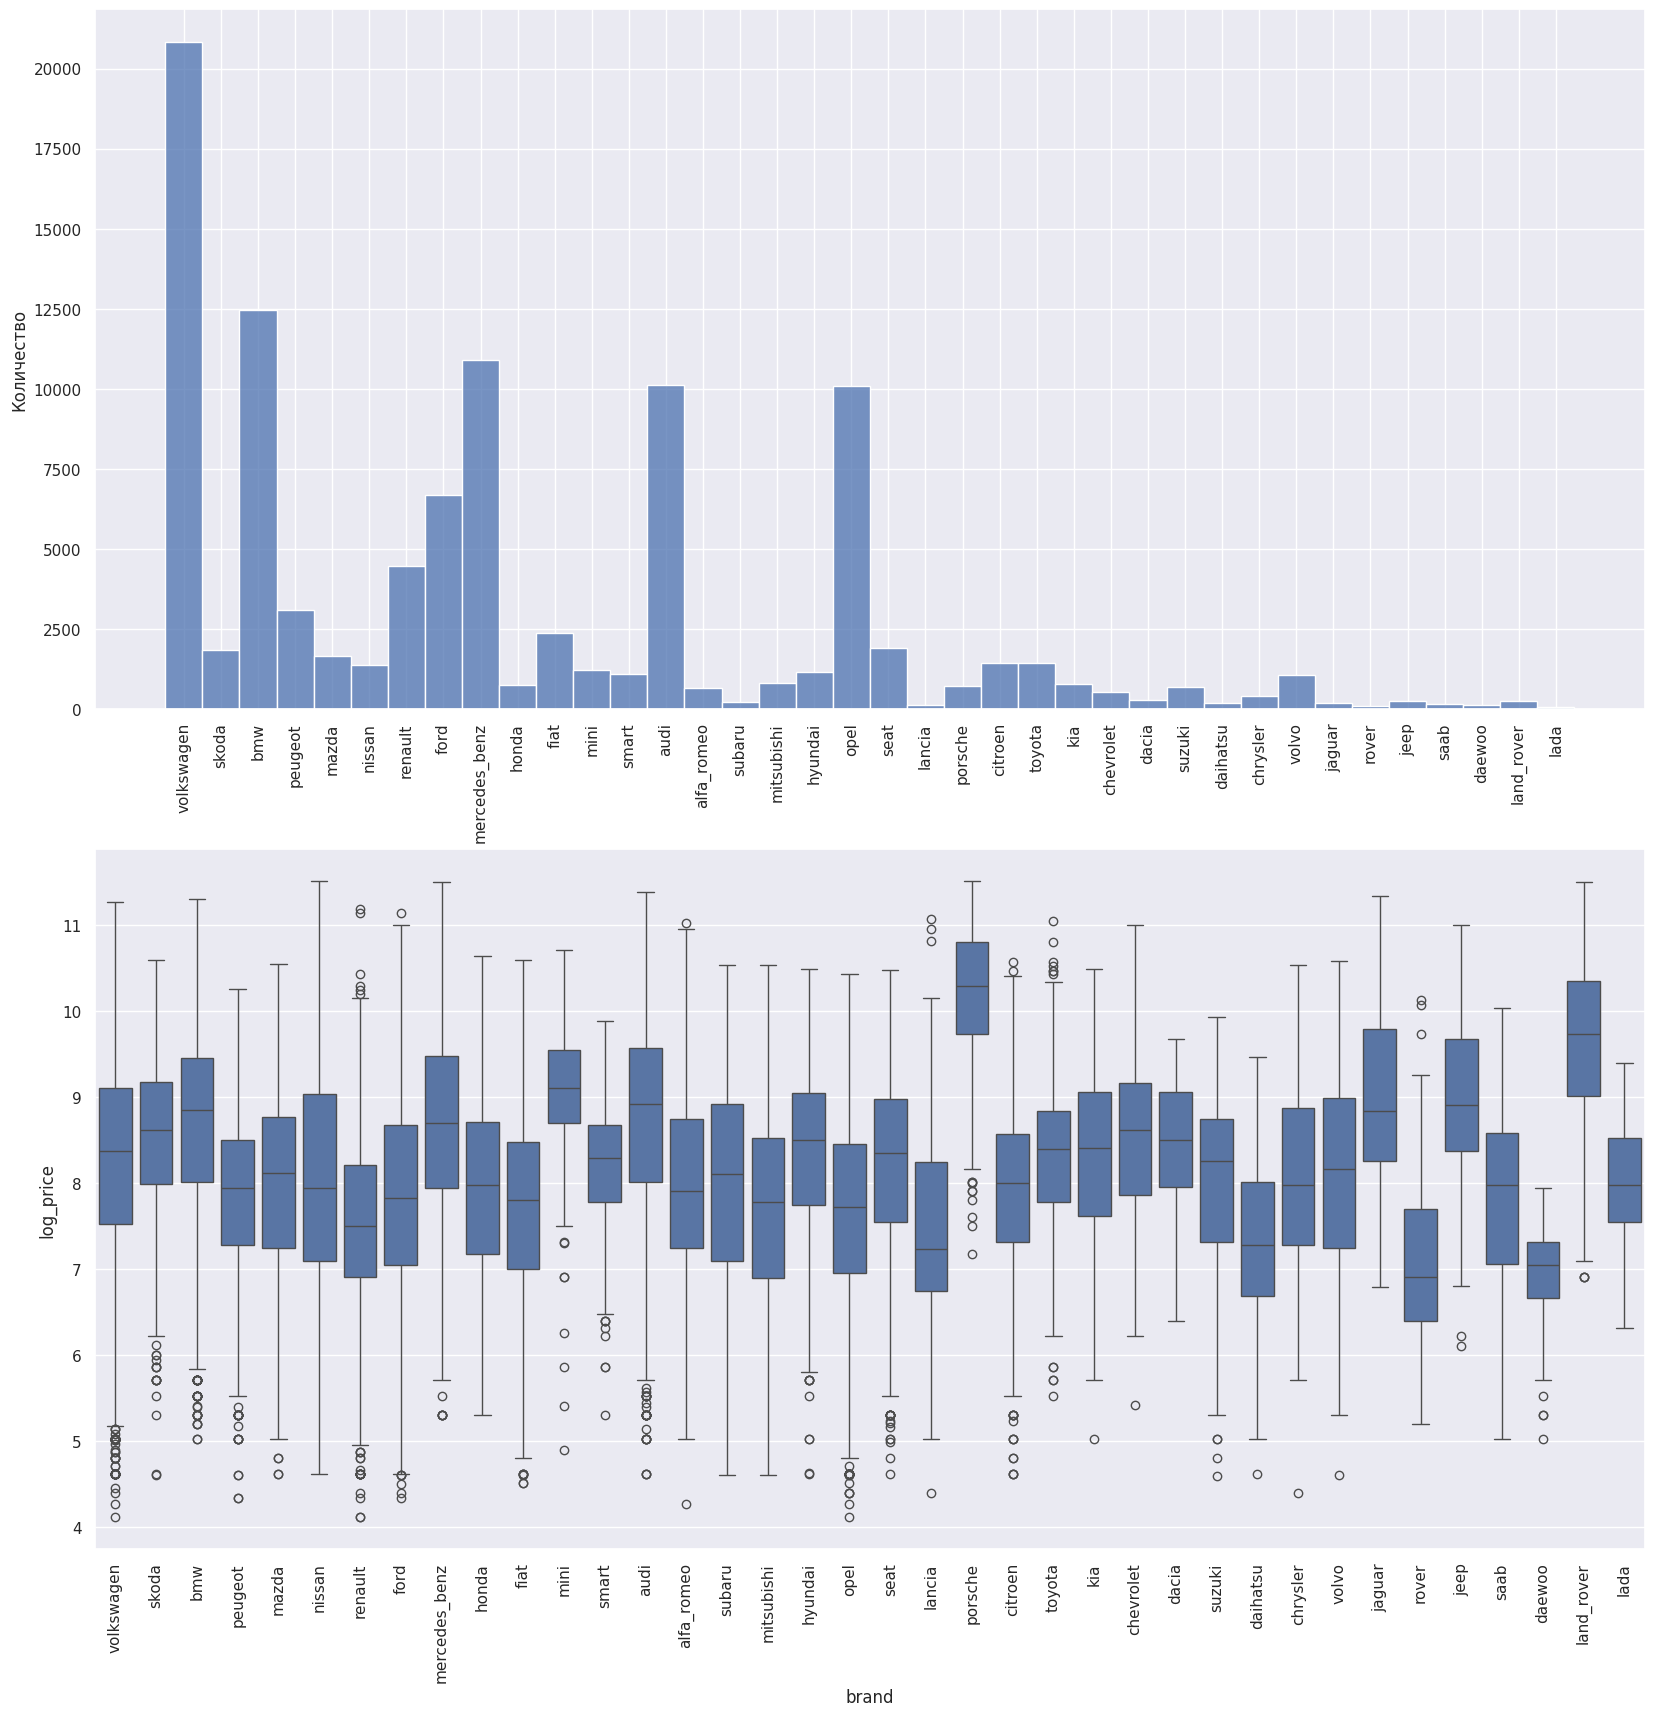

In [18]:
#brand
fig, axes = plt.subplots(2, 1, figsize=(20, 20))
axes[0].tick_params(axis='x', rotation=90)
sns.histplot(data['brand'], ax = axes[0])
axes[0].set_ylabel('Количество')
sns.boxplot( data = data, y = 'log_price', x = 'brand', ax = axes[1])
axes[1].tick_params(axis='x', rotation=90)

Как мы видим, это вполне хороший категор. признак, который сильно влияет на целевую переменную, что неудивительно, так как у разных фирм взачастую разный рынок. Пока что пропустим model, посмотрим на другие.

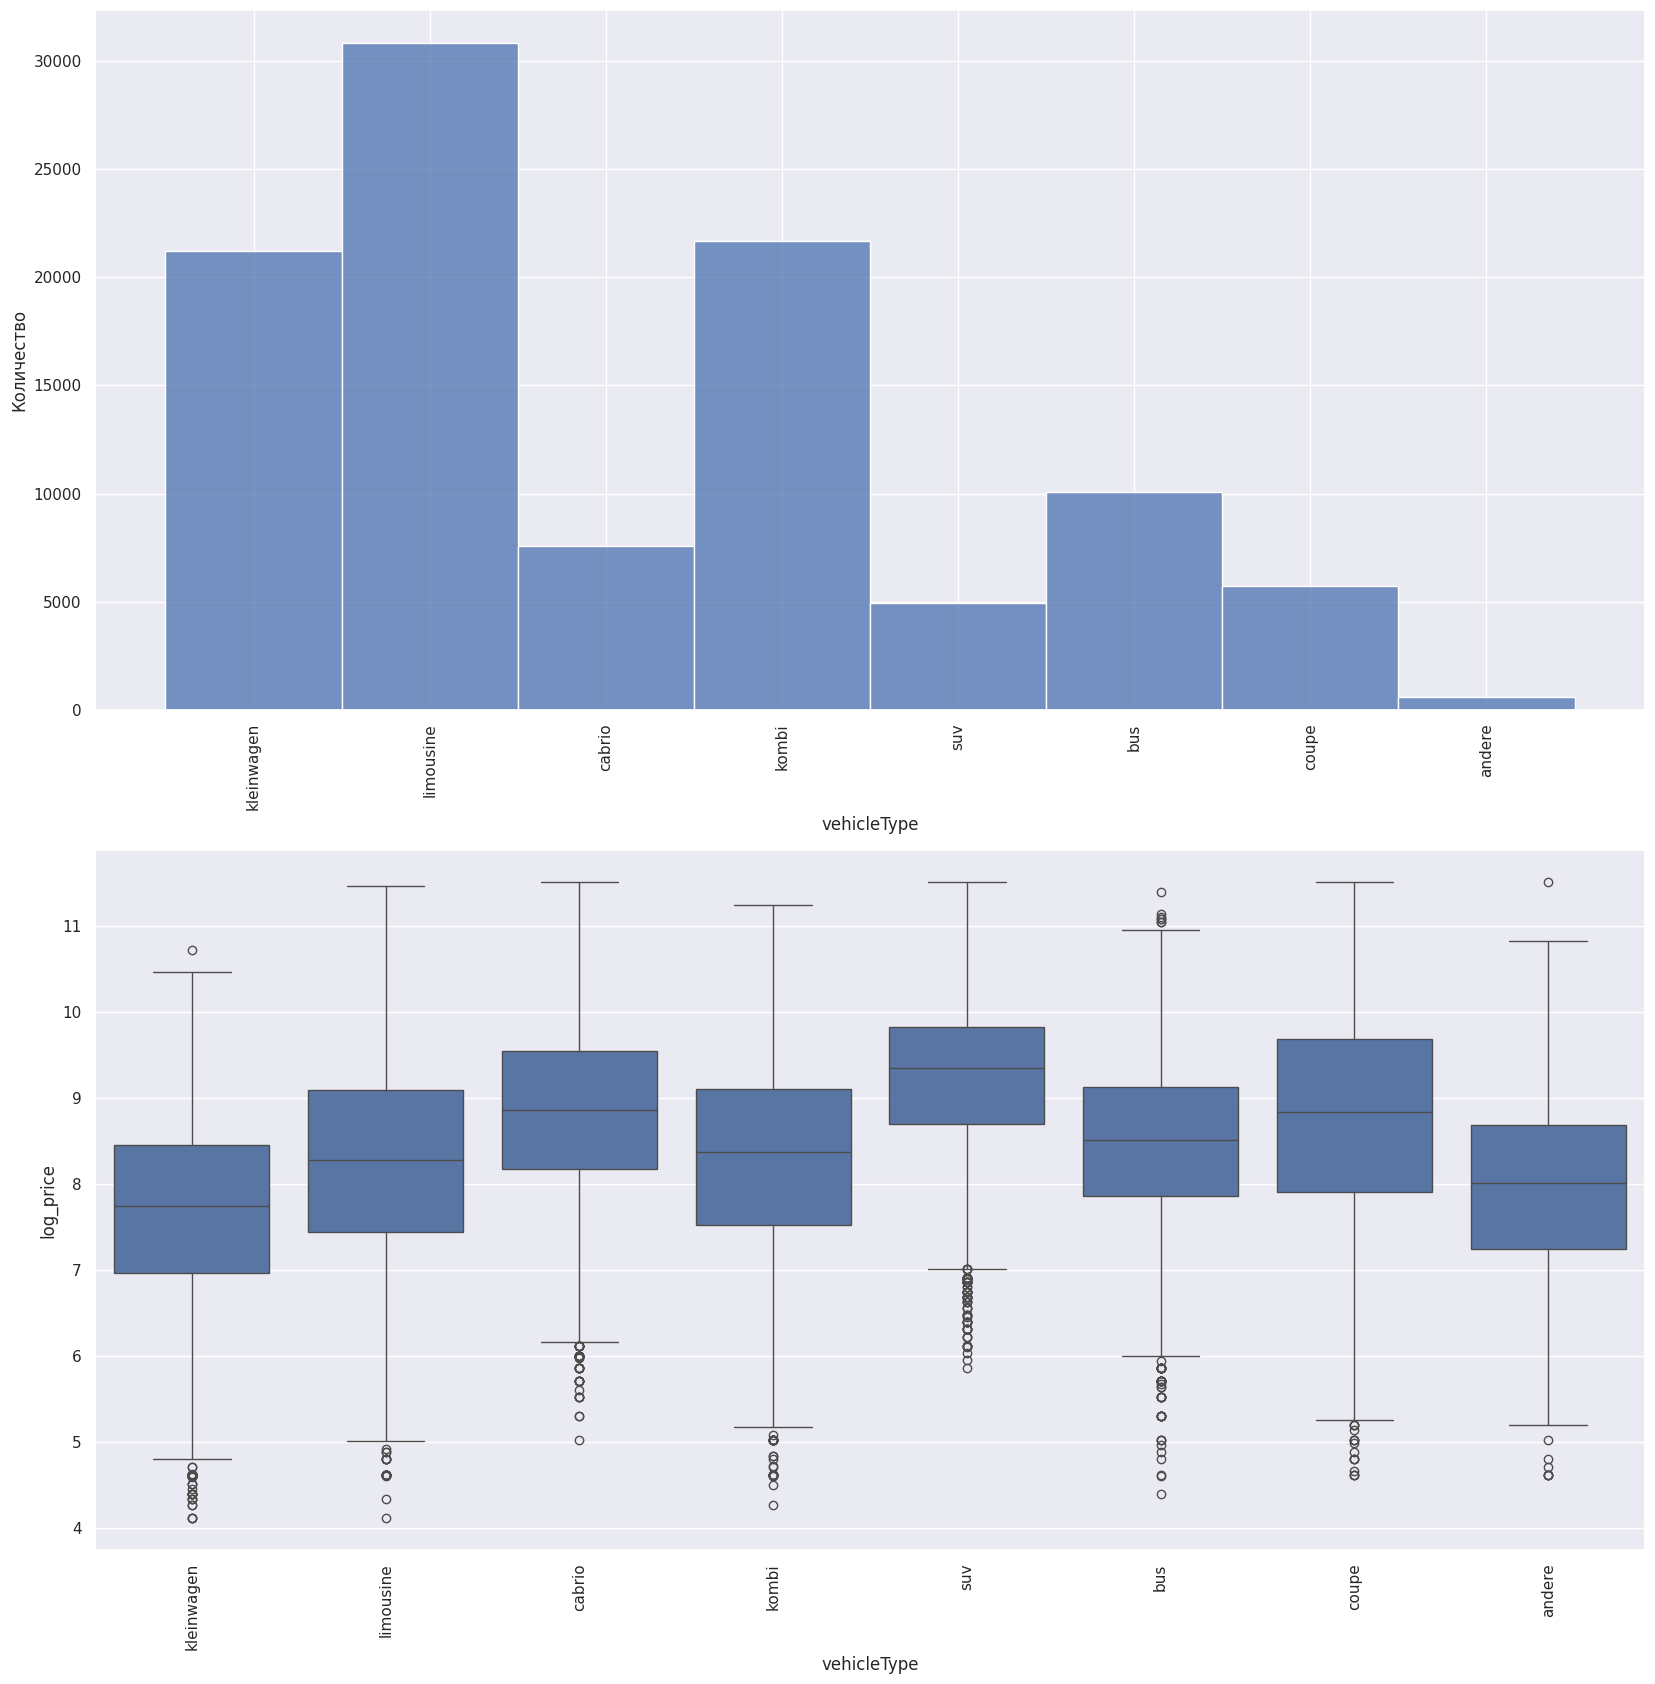

In [19]:
#vehicleType
fig, axes = plt.subplots(2, 1, figsize=(20, 20))
axes[0].tick_params(axis='x', rotation=90)
sns.histplot(data['vehicleType'], ax = axes[0])
axes[0].set_ylabel('Количество')
sns.boxplot( data = data, y = 'log_price', x = 'vehicleType', ax = axes[1])
axes[1].tick_params(axis='x', rotation=90)

Аналогично, влияет, снова неудивительно, разные типы машин стоят по-разному.

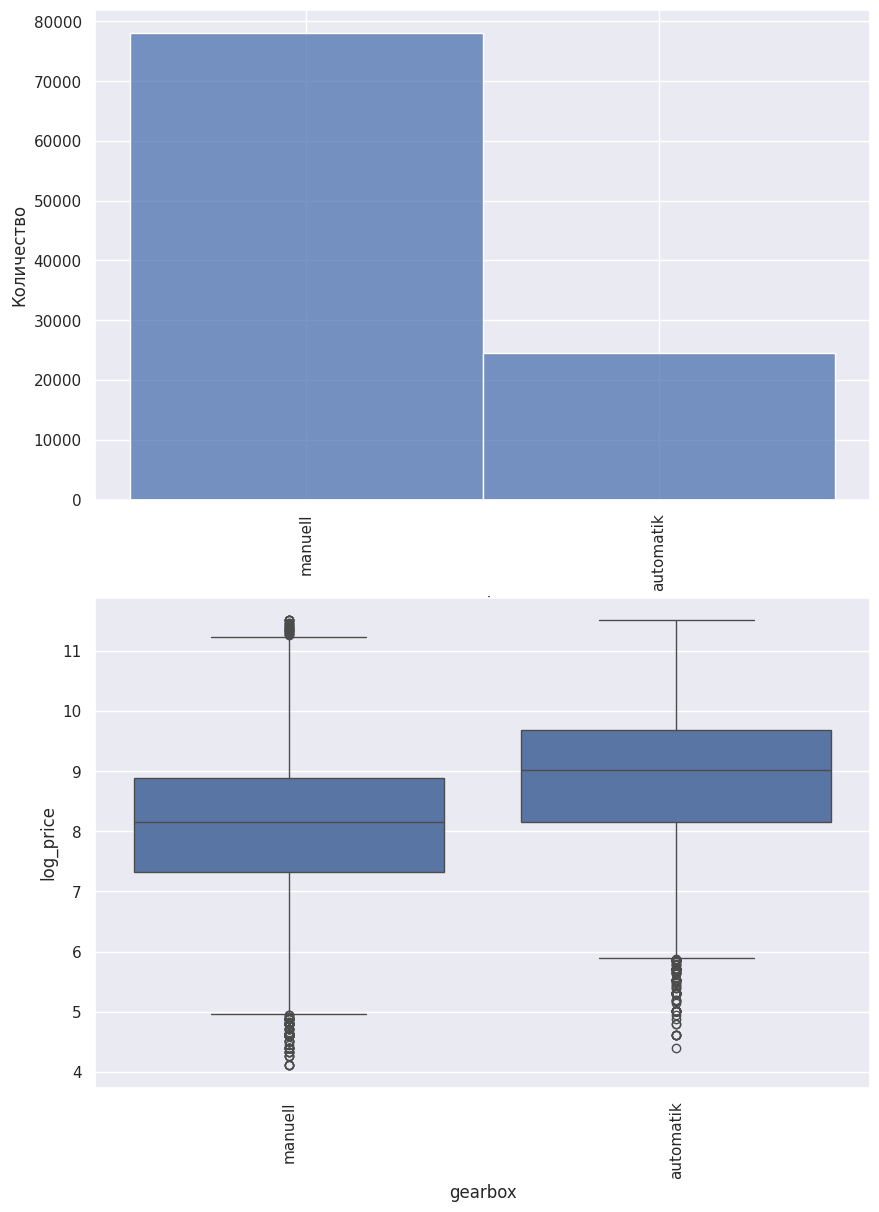

In [20]:
#gearbox
fig, axes = plt.subplots(2, 1, figsize=(10, 14))
axes[0].tick_params(axis='x', rotation=90)
sns.histplot(data['gearbox'], ax = axes[0])
axes[0].set_ylabel('Количество')
sns.boxplot( data = data, y = 'log_price', x = 'gearbox', ax = axes[1])
axes[1].tick_params(axis='x', rotation=90)

И вновь влияет, автомат свидетельствует о большей стоимости.

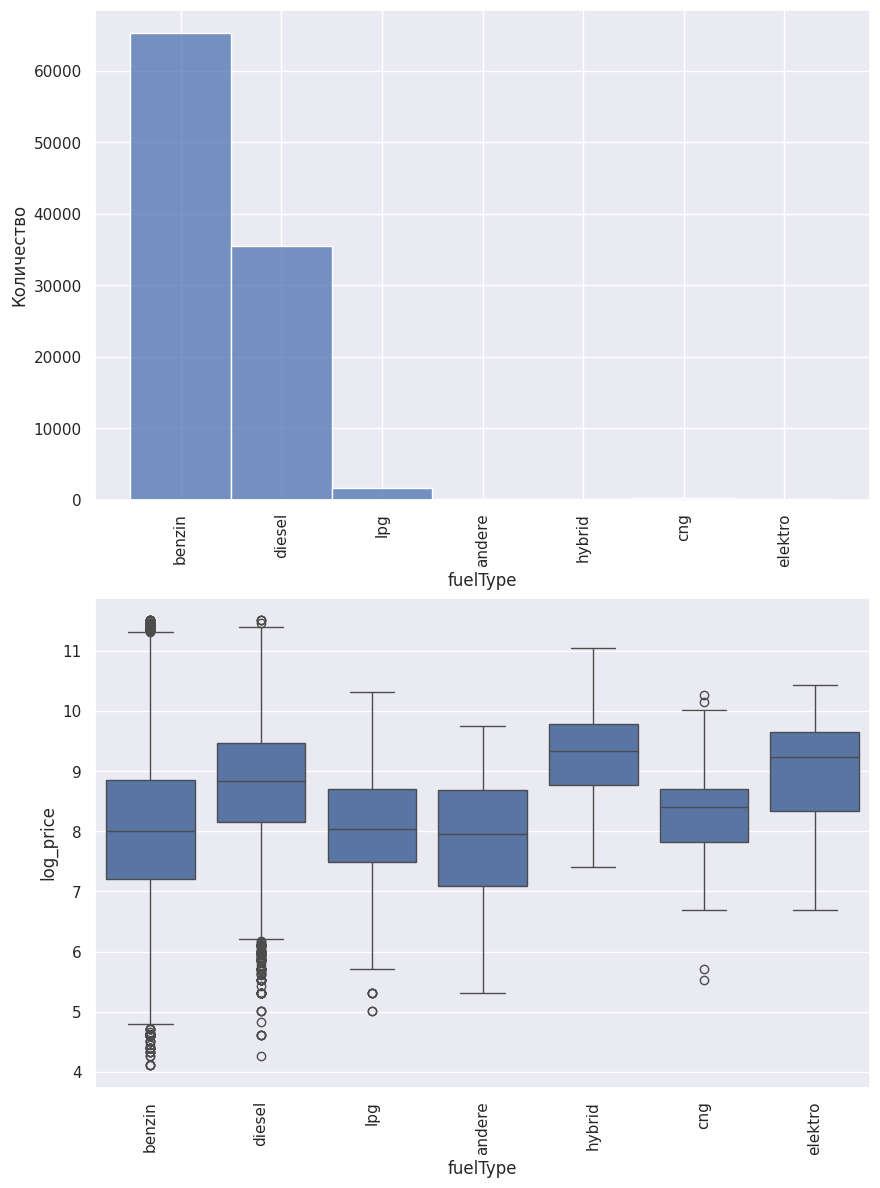

In [21]:
#fuelType
fig, axes = plt.subplots(2, 1, figsize=(10, 14))
axes[0].tick_params(axis='x', rotation=90)
sns.histplot(data['fuelType'], ax = axes[0])
axes[0].set_ylabel('Количество')
sns.boxplot( data = data, y = 'log_price', x = 'fuelType', ax = axes[1])
axes[1].tick_params(axis='x', rotation=90)

Снова, существенное  влияение есть. Электрокары в среднем - люкс/окололюкс автомобили, а бензиновые в среднем - большинство машин.

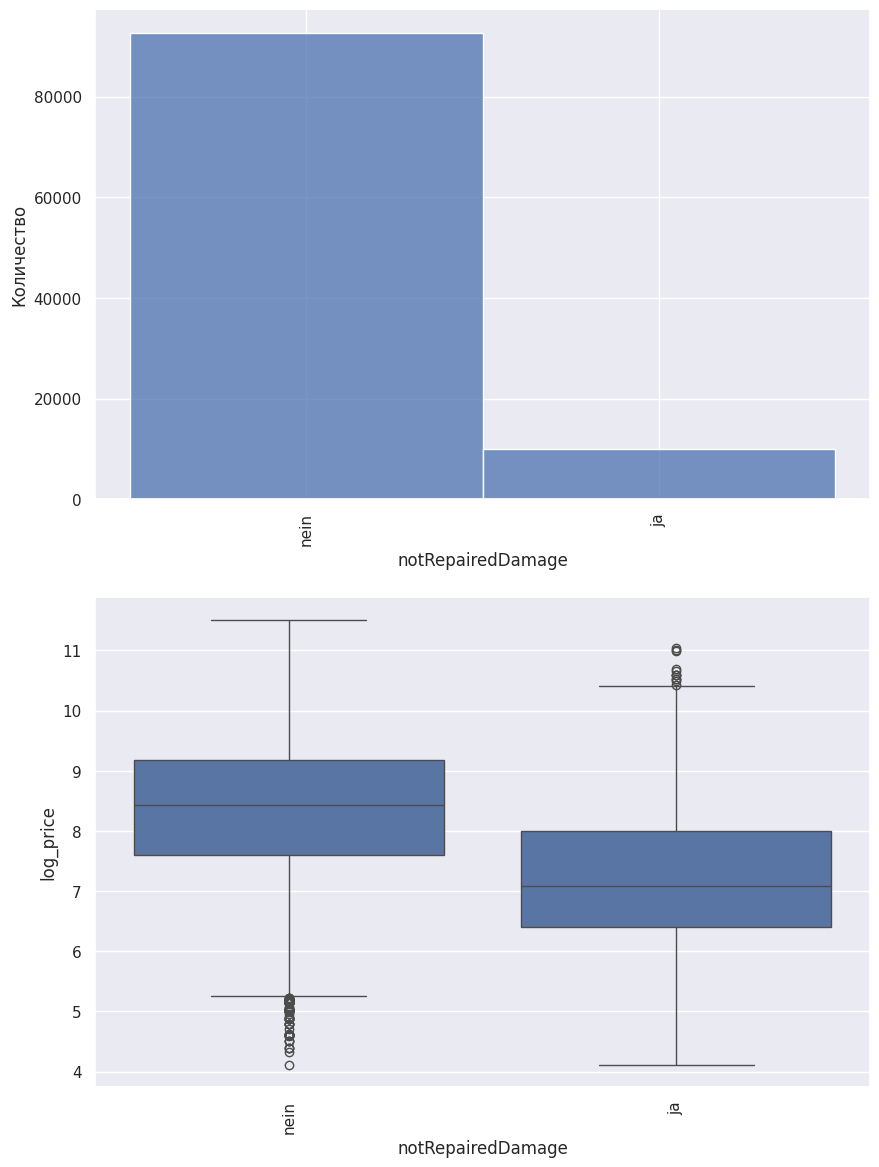

In [22]:
#notRepairedDamage
fig, axes = plt.subplots(2, 1, figsize=(10, 14))
axes[0].tick_params(axis='x', rotation=90)
sns.histplot(data['notRepairedDamage'], ax = axes[0], bins = 2)
axes[0].set_ylabel('Количество')
sns.boxplot( data = data, y = 'log_price', x = 'notRepairedDamage', ax = axes[1])
axes[1].tick_params(axis='x', rotation=90)

Неудивительно, что машины с поломками стоят в среднем дешевле.

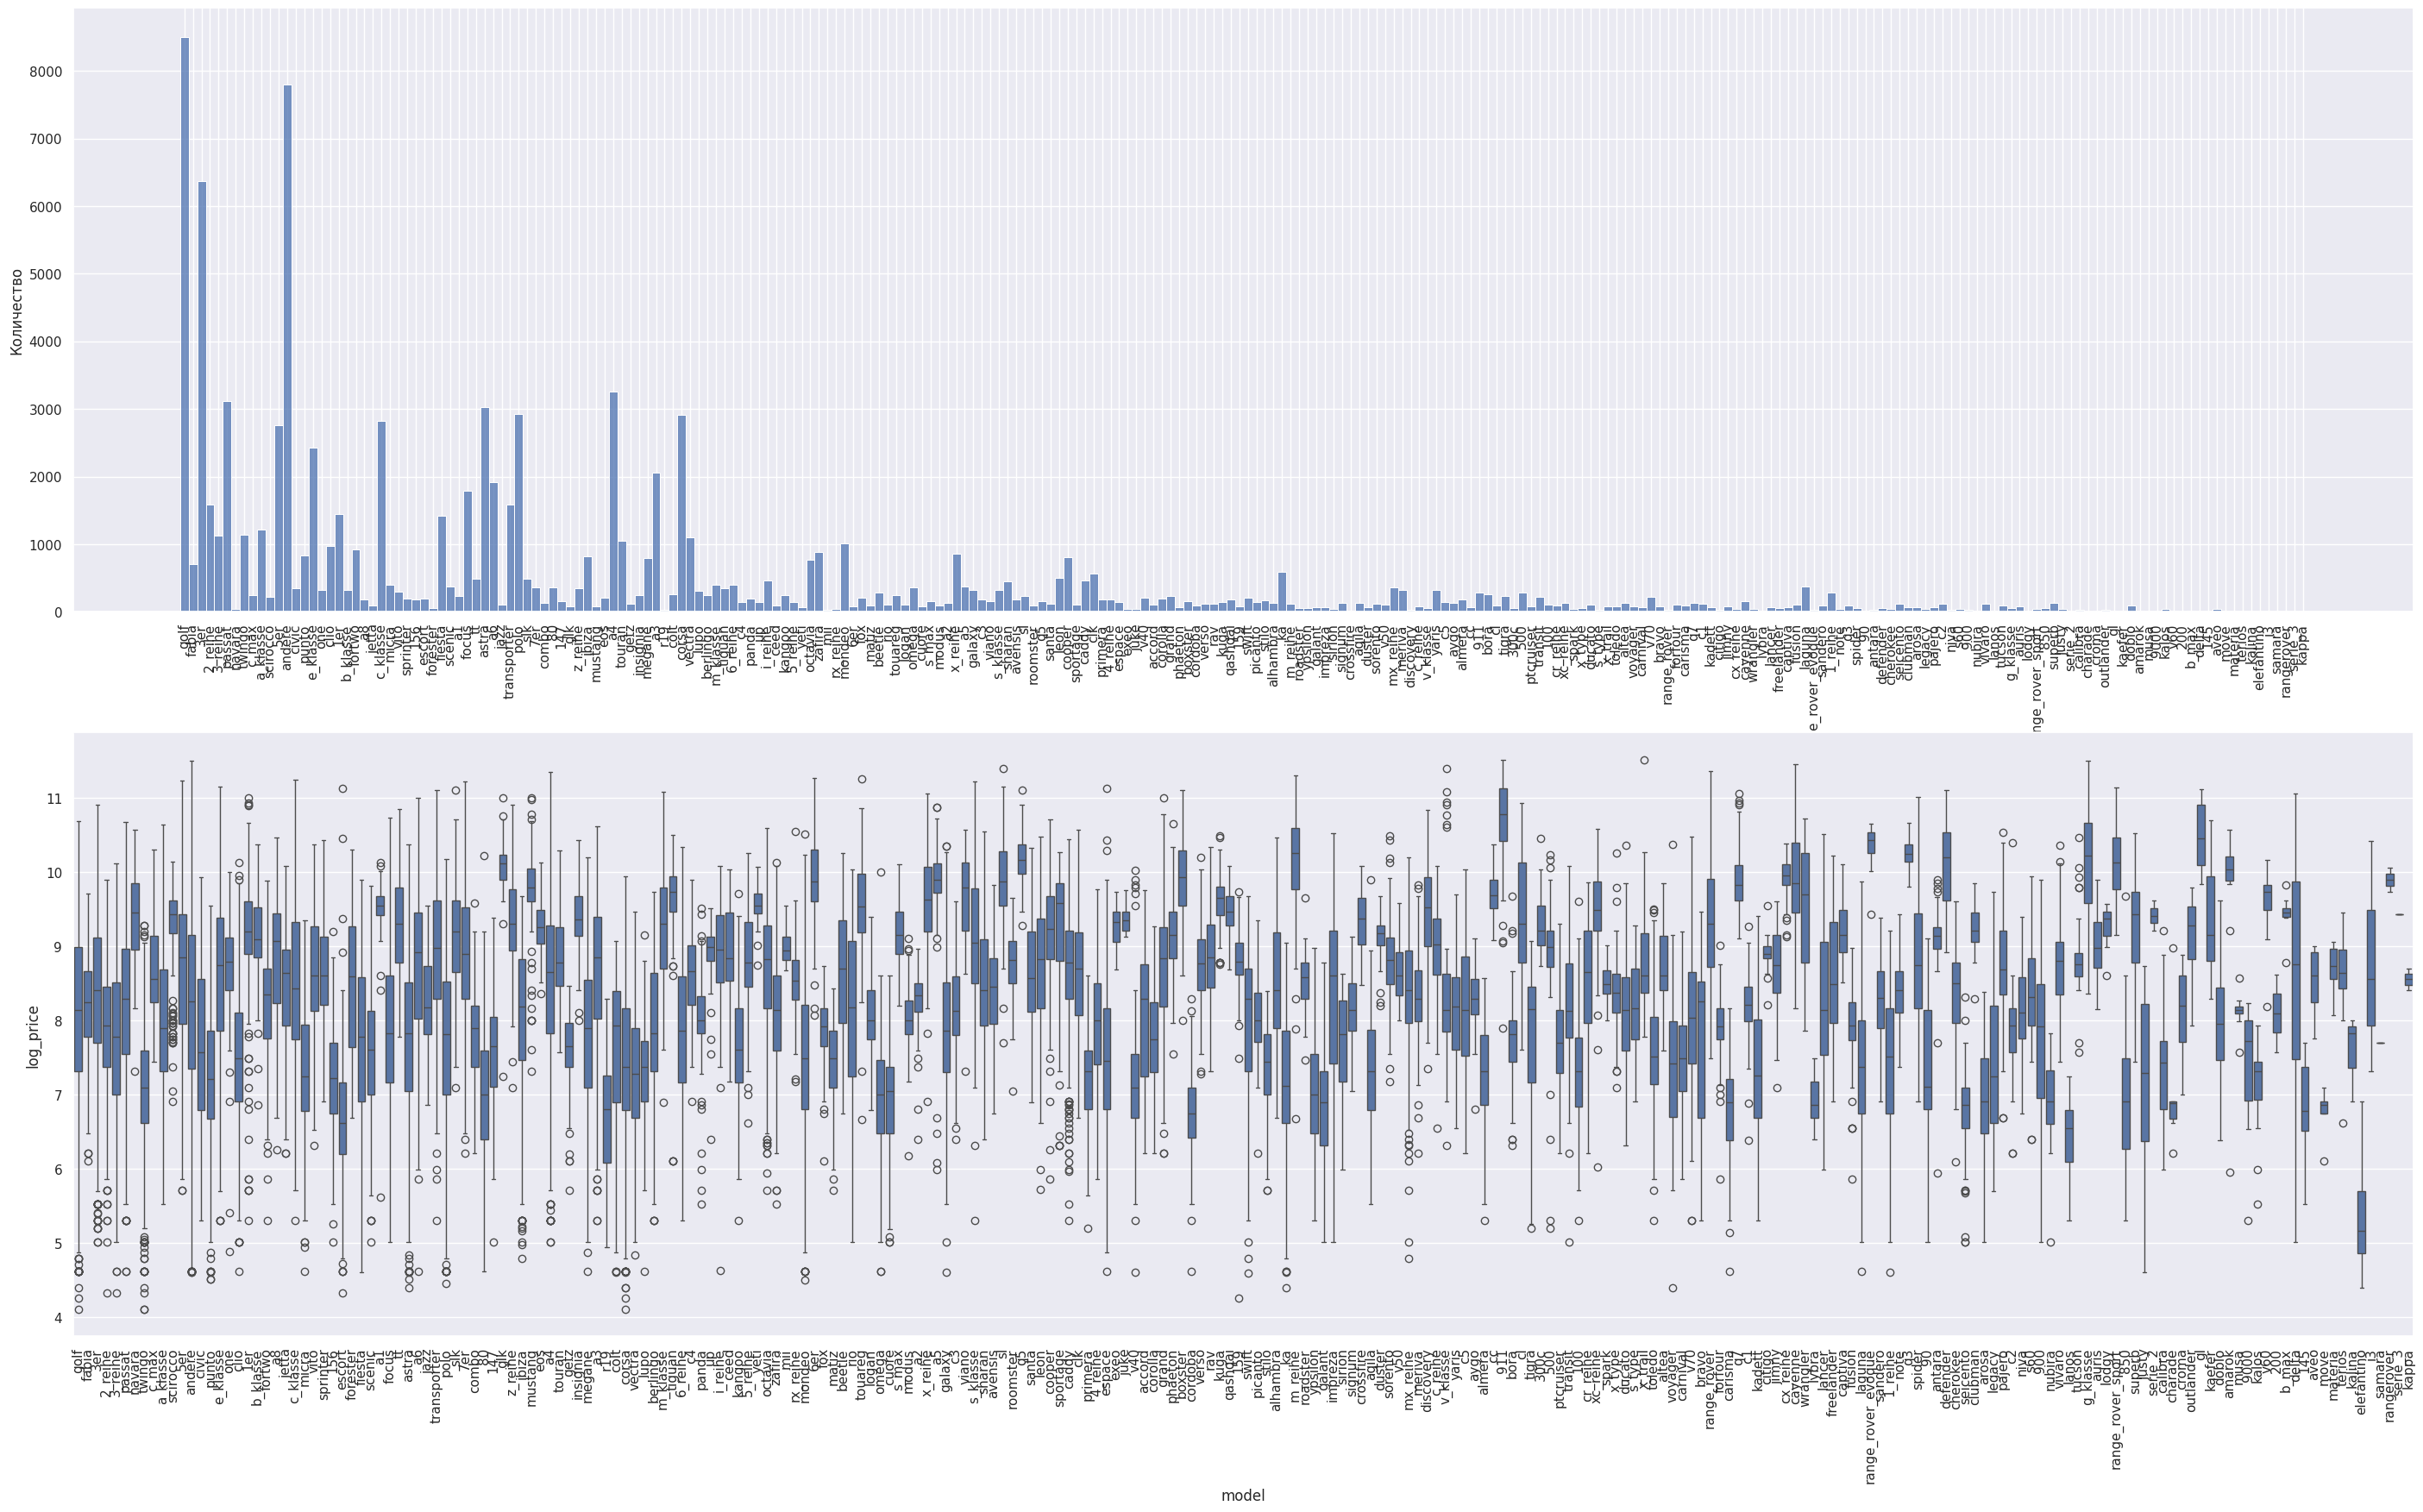

In [23]:
#model
fig, axes = plt.subplots(2, 1, figsize=(35, 20))
axes[0].tick_params(axis='x', rotation=90)
sns.histplot(data['model'], ax = axes[0], bins = 2)
axes[0].set_ylabel('Количество')
sns.boxplot( data = data, y = 'log_price', x = 'model', ax = axes[1])
axes[1].tick_params(axis='x', rotation=90)

Прошу прощения за нечитаемые подписи, но я не знаю, как сделать это лучше. Однако график достаточно читаемый, чтобы с уверенностью сказать, что модель влияет на цену. Но стоит отметить, что вероятно, тогда данные о брэнде, о типах тс, трансмисси, топлива - излишни, так как эти данные вшиты в модель. Но отвергать ни их, ни модель не будем, и вот почему:
Иногда выпускаются модели с изначально огромной проблемой, и не смотря на то, что все прочие данные могут пересекаться на пример с предыдущим поколением, именно эта проблема существенно снизит её стоимость. Пример из головы: решили в новой модели поменять инжектор на эксперементальный и некачественный, из-за чего движки изнашиваются значительно быстрее.
Далее посмотрим уже на числовые признаки.

Text(0.5, 0, 'Лошадиные силы')

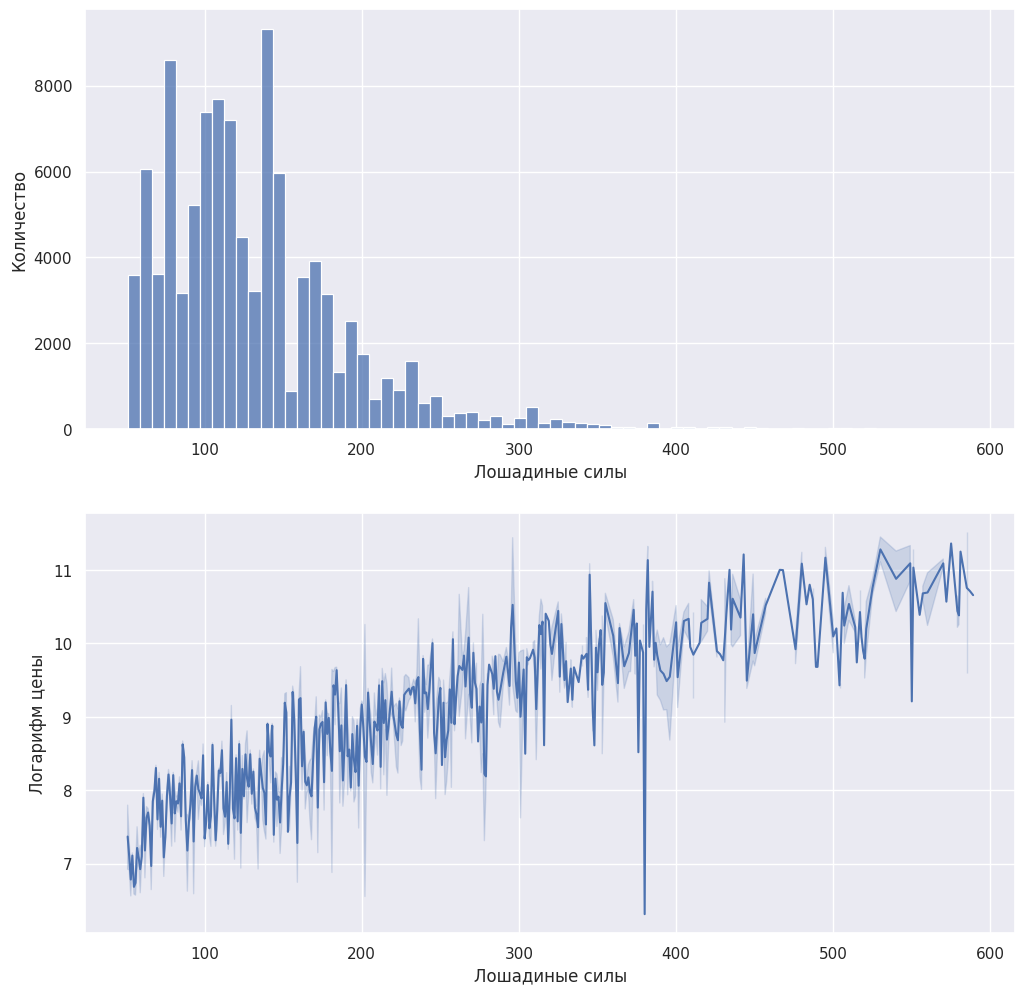

In [24]:
#powerPS
fig, axes = plt.subplots(2, 1, figsize=(12, 12))
sns.histplot(data['powerPS'], ax = axes[0], bins = 70)
axes[0].set_ylabel('Количество')
axes[0].set_xlabel('Лошадиные силы')
sns.lineplot(x='powerPS', y='log_price', data=data, ax = axes[1])
axes[1].set_ylabel('Логарифм цены')
axes[1].set_xlabel('Лошадиные силы')

Видим, что имеется положительный тренд цены от мощности, признак хороший.

Text(0.5, 0, 'Пробег')

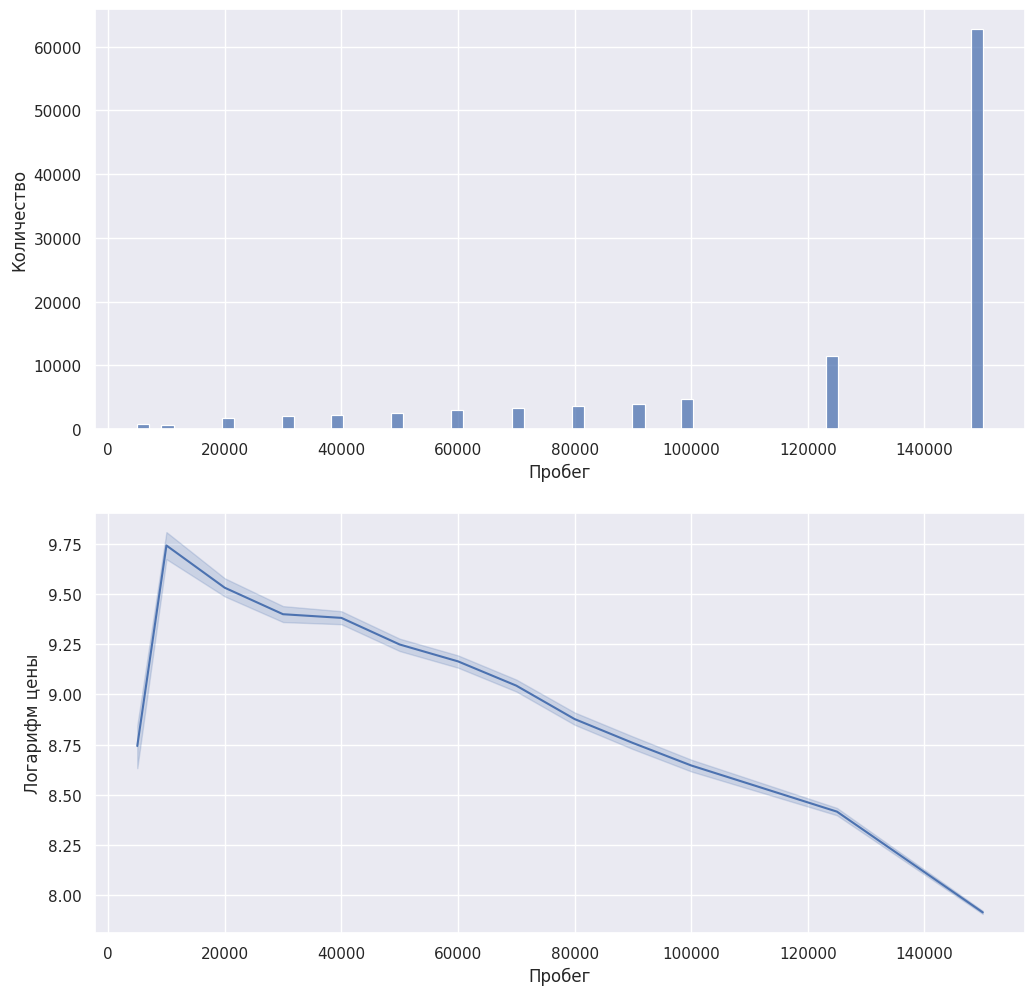

In [25]:
#kilometer
fig, axes = plt.subplots(2, 1, figsize=(12, 12))
sns.histplot(data['kilometer'], ax = axes[0], bins = 70)
axes[0].set_ylabel('Количество')
axes[0].set_xlabel('Пробег')
sns.lineplot(x='kilometer', y='log_price', data=data, ax = axes[1])
axes[1].set_ylabel('Логарифм цены')
axes[1].set_xlabel('Пробег')

Text(0.5, 0, 'Возраст в месяцах')

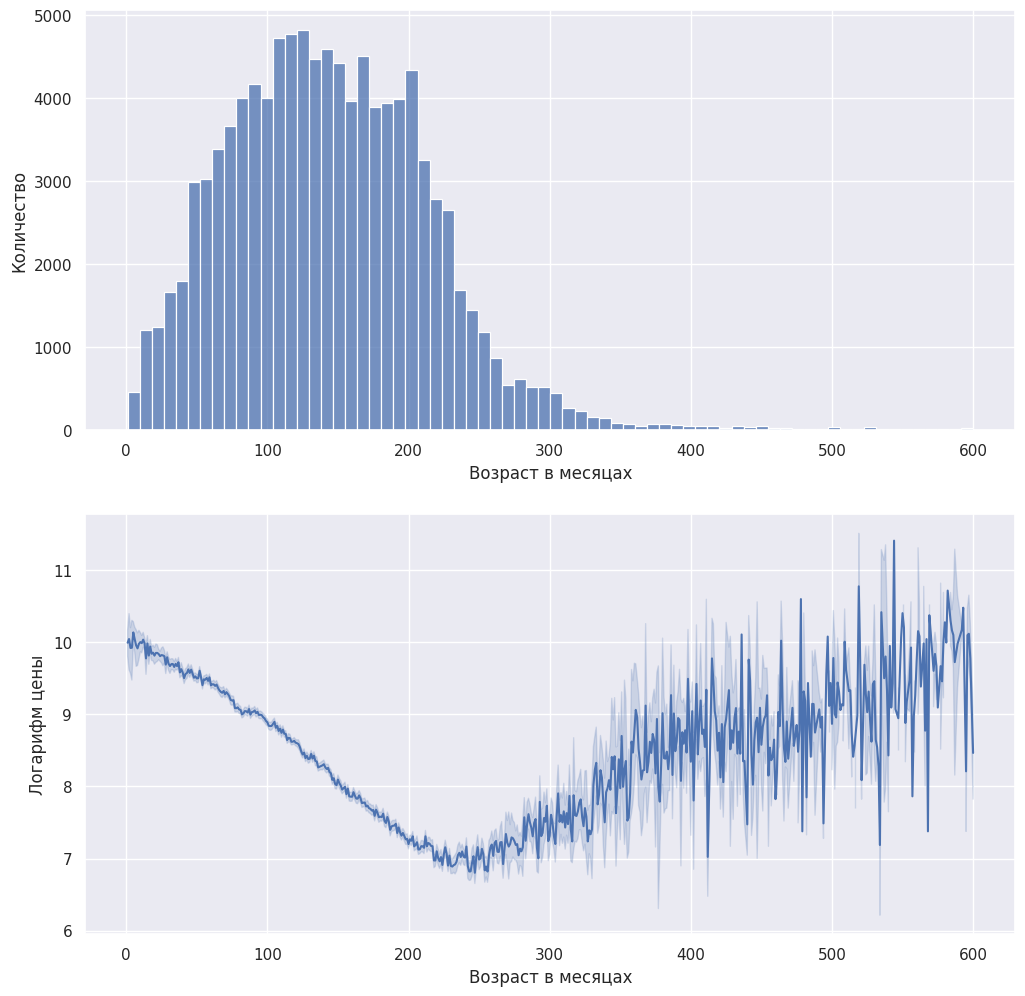

In [26]:
#autoAgeMonths
fig, axes = plt.subplots(2, 1, figsize=(12, 12))
sns.histplot(data['autoAgeMonths'], ax = axes[0], bins = 70)
axes[0].set_ylabel('Количество')
axes[0].set_xlabel('Возраст в месяцах')
sns.lineplot(x='autoAgeMonths', y='log_price', data=data, ax = axes[1])
axes[1].set_ylabel('Логарифм цены')
axes[1].set_xlabel('Возраст в месяцах')

Заметим, что для последних двух особая ситуация. Они имееют максимум и минимум соответственно, и похожи на "параболу" по форме. Для того, чтобы учесть обе стороны, введем дамми признак, который будет обозначать до или после экстремума находится объект. И в признаки добавим дамми*изначальный признак.

In [27]:
max_kilometer = 20000 #(data[data['log_price'] == data['log_price'].max()]['kilometer'])
min_age = 210 #(data[data['log_price'] == data['log_price'].min()]['autoAgeMonths'])
data['uprsing_kilometer'] = data['kilometer']*(data['kilometer'] < max_kilometer)
data['uprsing_age'] = data['autoAgeMonths']*(data['autoAgeMonths'] > min_age)

Кратко подведем, все признаки полезны, даже понадобились дополнительные. OHE используем, для brand, vehicleType, fuelType. gearbox и notRepairedDamage приведем к бинарным признакам 'automatik' и 'Damage'.  Для model я предполагаю, что mean_target был бы лучше (сократил бы число признаков), но в силу большой выборки, OHE будет не сильно хуже. Для powerPS, kilometer, autoAgeMonths и их произведений с дамми признаками используем скейлер. Остальные (2 бинарных признака) оставляем необработанными.

In [28]:
data['automatik'] = (data['gearbox'] == 'automatik')
data = data.drop(columns='gearbox')
data['Damage'] = (data['notRepairedDamage'] == 'ja')
data = data.drop(columns='notRepairedDamage')

In [29]:
data.dtypes

,0
brand,object
model,object
vehicleType,object
fuelType,object
powerPS,int64
kilometer,int64
autoAgeMonths,float64
price,float64
log_price,float64
uprsing_kilometer,int64


Колонки в данных:

* `brand` - название бренда автомобиля
* `model` - название модели автомобиля
* `vehicleType` - тип транспортного средства
* `gearbox` - тип трансмисcии
* `fuelType` - какой вид топлива использует автомобиль
* `notRepairedDamage` - есть ли в автомобиле неисправность, которая еще не устранена
* `powerPS` - мощность автомобиля в PS (метрическая лошадиная сила)
* `kilometer` - сколько километров проехал автомобиль, пробег
* `autoAgeMonths` - возраст автомобиля в месяцах


* `price` - цена, указанная в объявлении о продаже автомобиля (целевая переменная)

In [30]:

categorical = ['brand', 'model', 'vehicleType', 'fuelType']
numeric = ['powerPS', 'kilometer', 'autoAgeMonths', 'uprsing_kilometer', 'uprsing_age']
other = ['automatik', 'Damage']

# YOUR CODE (EDA): выполнено ранее

In [31]:
data['bias'] = 1
other += ['bias']

x = data[categorical + numeric + other]
y = data['log_price']

In [32]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler


column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown='ignore'), categorical),
    ('scaling', StandardScaler(), numeric),
    ('other',  'passthrough', other)
])

x = column_transformer.fit_transform(x)

In [33]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=10)
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=0.5, random_state=10)
y_train = y_train.to_numpy()
y_val = y_val.to_numpy()
y_test = y_test.to_numpy()

## Задание 5. Сравнение методов градиентного спуска (2 балла)

В этом задании вам предстоит сравнить методы градиентного спуска на подготовленных вами данных из предыдущего задания.

### Задание 5.1. Подбор оптимальной длины шага (1 балл)

Подберите по валидационной выборке наилучшую длину шага $\lambda$ для каждого метода с точки зрения ошибки. Для этого сделайте перебор по логарифмической сетке. Для каждого метода посчитайте ошибку на обучающей и тестовой выборках, посчитайте качество по метрике $R^2$, сохраните количество итераций до сходимости.

Все параметры кроме `lambda_` стоит выставить равным значениям по умолчанию.

In [34]:
lambdas = np.logspace(-8, 2, 30)

best_full = np.inf
best_stochastic = np.inf
best_momentum = np.inf
best_adam = np.inf
lambda_full = 0
lambda_stochastic = 0
lambda_momentum = 0
lambda_adam = 0

for lambda_ in lambdas:
  model = LinearRegression({'descent_name' : 'full', 'kwargs' : {'dimension' : x_train.shape[1], 'lambda_' : lambda_}})
  model.fit(x_train, y_train)
  err = model.calc_loss(x_val, y_val)
  if err < best_full:
    best_full = err
    lambda_full = lambda_

  model = LinearRegression({'descent_name' : 'stochastic', 'kwargs' : {'dimension' : x_train.shape[1], 'lambda_' : lambda_}})
  model.fit(x_train, y_train)
  err = model.calc_loss(x_val, y_val)
  if err < best_stochastic:
    best_stochastic = err
    lambda_stochastic = lambda_

  model = LinearRegression({'descent_name' : 'momentum',  'kwargs' : {'dimension' : x_train.shape[1], 'lambda_' : lambda_}})
  model.fit(x_train, y_train)
  err = model.calc_loss(x_val, y_val)
  if err < best_momentum:
    best_momentum = err
    lambda_momentum = lambda_

  model = LinearRegression({'descent_name' : 'adam', 'kwargs' : {'dimension' : x_train.shape[1], 'lambda_' : lambda_}})
  model.fit(x_train, y_train)
  err = model.calc_loss(x_val, y_val)
  if err < best_adam:
    best_adam = err
    lambda_adam = lambda_

/content/descents.py:79: RuntimeWarning: overflow encountered in matmul
  return diff.T @ diff / x.shape[0]
/content/linear_regression.py:44: RuntimeWarning: overflow encountered in matmul
  if np.isnan(np.sum(diff)) or i >= self.max_iter or (diff.T @ diff) < self.tolerance:
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/content/descents.py:109: RuntimeWarning: invalid value encountered in add
  self.w += diff


In [35]:
model_full = LinearRegression({'descent_name' : 'full', 'kwargs' : {'dimension' : x_train.shape[1], 'lambda_' : lambda_full}})
model_stochastic = LinearRegression({'descent_name' : 'stochastic', 'kwargs' : {'dimension' : x_train.shape[1], 'lambda_' : lambda_stochastic}})
model_momentum = LinearRegression({'descent_name' : 'momentum',  'kwargs' : {'dimension' : x_train.shape[1], 'lambda_' : lambda_momentum}})
model_adam = LinearRegression({'descent_name' : 'adam', 'kwargs' : {'dimension' : x_train.shape[1], 'lambda_' : lambda_adam}})

model_full.fit(x_train, y_train)
model_stochastic.fit(x_train, y_train)
model_momentum.fit(x_train, y_train)
model_adam.fit(x_train, y_train)

def calc_rss(x, y, model): # RSS по лог. целевой переменной
  TSS = (y - np.mean(y))@(y - np.mean(y))
  d = (model.predict(x) - y)
  RSS = d.T @ d
  return 1 - RSS/TSS

def calc_rss_log(x, y, model): # RSS по целевой переменной
  exp_y = np.expm1(y)
  TSS = (exp_y - np.mean(exp_y))@(exp_y - np.mean(exp_y))
  d = (np.expm1(model.predict(x)) - exp_y)
  RSS = d.T @ d
  return 1 - RSS/TSS


print("MSE_TRAIN_FULL:", model_full.calc_loss(x_train, y_train))
print("MSE_TEST_FULL:", model_full.calc_loss(x_test, y_test))
print("RSS_TRAIN_FULL_LOG:", calc_rss(x_train, y_train, model_full))
print("RSS_TEST_FULL_LOG:", calc_rss(x_test, y_test, model_full))
print("RSS_TRAIN_FULL:", calc_rss_log(x_train, y_train, model_full))
print("RSS_TEST_FULL:", calc_rss_log(x_test, y_test, model_full))
print()
print("MSE_TRAIN_STOC:", model_stochastic.calc_loss(x_train, y_train))
print("MSE_TEST_STOC:", model_stochastic.calc_loss(x_test, y_test))
print("RSS_TRAIN_STOC_LOG:", calc_rss(x_train, y_train, model_stochastic))
print("RSS_TEST_STOC_LOG:", calc_rss(x_test, y_test, model_stochastic))
print("RSS_TRAIN_STOC:", calc_rss_log(x_train, y_train, model_stochastic))
print("RSS_TEST_STOC:", calc_rss_log(x_test, y_test, model_stochastic))
print()
print("MSE_TRAIN_MOMENTUM:", model_momentum.calc_loss(x_train, y_train))
print("MSE_TEST_MOMENTUM:", model_momentum.calc_loss(x_test, y_test))
print("RSS_TRAIN_MOMENTUM_LOG:", calc_rss(x_train, y_train, model_momentum))
print("RSS_TEST_MOMENTUM_LOG:", calc_rss(x_test, y_test, model_momentum))
print("RSS_TRAIN_MOMENTUM:", calc_rss_log(x_train, y_train, model_momentum))
print("RSS_TEST_MOMENTUM:", calc_rss_log(x_test, y_test, model_momentum))
print()
print("MSE_TRAIN_ADAM:", model_adam.calc_loss(x_train, y_train))
print("MSE_TEST_ADAM:", model_adam.calc_loss(x_test, y_test))
print("RSS_TRAIN_ADAM_LOG:", calc_rss(x_train, y_train, model_adam))
print("RSS_TEST_ADAM_LOG:", calc_rss(x_test, y_test, model_adam))
print("RSS_TRAIN_ADAM:", calc_rss_log(x_train, y_train, model_adam))
print("RSS_TEST_ADAM:", calc_rss_log(x_test, y_test, model_adam))

MSE_TRAIN_FULL: 0.33483632951052206
MSE_TEST_FULL: 0.34621932585884413
RSS_TRAIN_FULL_LOG: 0.732680965360437
RSS_TEST_FULL_LOG: 0.7288155211884082
RSS_TRAIN_FULL: 0.3763103030237548
RSS_TEST_FULL: 0.34414590550168755

MSE_TRAIN_STOC: 0.3480262855696999
MSE_TEST_STOC: 0.3625129722138702
RSS_TRAIN_STOC_LOG: 0.7221506673911814
RSS_TEST_STOC_LOG: 0.716053137159824
RSS_TRAIN_STOC: 0.41859227176837177
RSS_TEST_STOC: 0.4520715745752467

MSE_TRAIN_MOMENTUM: 0.2767366715349088
MSE_TEST_MOMENTUM: 0.2871772093648157
RSS_TRAIN_MOMENTUM_LOG: 0.779065252590063
RSS_TEST_MOMENTUM_LOG: 0.7750616559171619
RSS_TRAIN_MOMENTUM: 0.39768176613157424
RSS_TEST_MOMENTUM: 0.44245572769400876

MSE_TRAIN_ADAM: 0.26689896449362127
MSE_TEST_ADAM: 0.2742535722266638
RSS_TRAIN_ADAM_LOG: 0.7869192580176944
RSS_TEST_ADAM_LOG: 0.7851844004894529
RSS_TRAIN_ADAM: 0.1461244023729159
RSS_TEST_ADAM: 0.23841738534891688


### Задание 5.2. Сравнение методов (1 балла)

Постройте график зависимости ошибки на обучающей выборке от номера итерации (все методы на одном графике).

Посмотрите на получившиеся результаты (таблички с метриками и график). Сравните методы между собой.

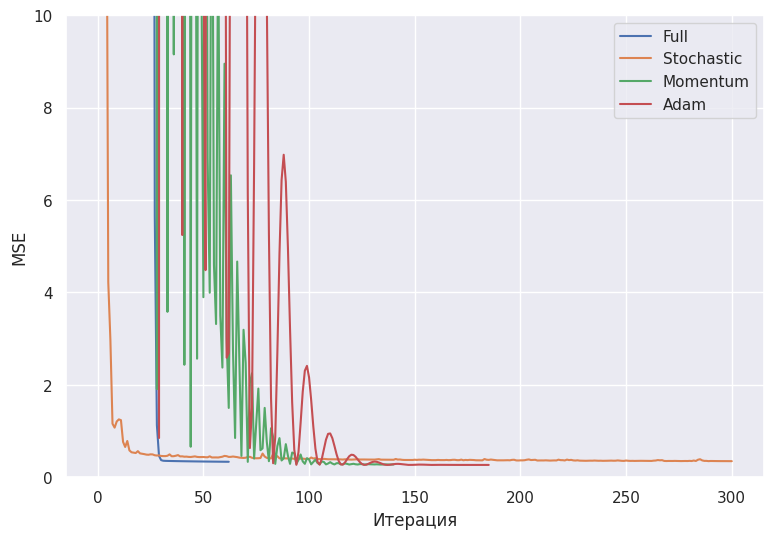

In [36]:
fig, ax = plt.subplots(figsize=(9, 6))
ax.plot(model_full.loss_history, label = 'Full')
ax.plot(model_stochastic.loss_history, label = 'Stochastic')
ax.plot(model_momentum.loss_history, label = 'Momentum')
ax.plot(model_adam.loss_history, label = 'Adam')

ax.set_xlabel("Итерация")
ax.set_ylabel("MSE")
ax.set_ylim(0, 10)
ax.legend()

График: Сходятся они в порядке Full, Momentum, Adam, Stochastic. Хотя стоит заметить, что меньше всего асцилляций у stochastic. У full видимо из-за переполнения возникает аномалия на графике. Adam быстрее приходит к +- необходимому уровню, чем Momentum, но последний быстрее стабилизируется у минимума.

Табличка: По ошибке в порядке возрастания на обучающих и тестовых выборках Adam, Momentum, Full, Stochastic. По RSS логарифма целевой, соответственно наоборот. Однако, когда мы берем RSS по изначальной переменной, мы видим другую картину.

Исходя из этого Я бы использовал Adam или Momentum. Они быстро сходятся и одновременно дают высокое качество приближения.

## Задание 6. Стохастический градиентный спуск и размер батча (1 балл)

В этом задании вам предстоит исследовать влияние размера батча на работу стохастического градиентного спуска.

* Сделайте по несколько запусков (например, k = 10) стохастического градиентного спуска на обучающей выборке для каждого размера батча из перебираемого списка. Замерьте время в секундах и количество итераций до сходимости. Посчитайте среднее этих значений для каждого размера батча.
* Постройте график зависимости количества шагов до сходимости от размера батча. _(под сходимостью понимается достижение критерия останова)_
* Постройте график зависимости времени до сходимости от размера батча.

Посмотрите на получившиеся результаты. Какие выводы можно сделать про подбор размера батча для стохастического градиентного спуска?

In [37]:
import time
batch_sizes = np.arange(5, 500, 10)
k = 10
batch_time = []
batch_iter = []


for batch_size in batch_sizes:
  curtime = 0
  iter = 0
  for i in range(k):
    t = time.time()
    model_stochastic = LinearRegression({'descent_name' : 'stochastic', 'kwargs' : {'dimension' : x_train.shape[1], 'lambda_': lambda_stochastic, 'batch_size' : batch_size}})
    model_stochastic.fit(x_train, y_train)
    curtime += time.time()-t
    iter += len(model_stochastic.loss_history)
  batch_time.append(curtime/k)
  batch_iter.append(iter/k)

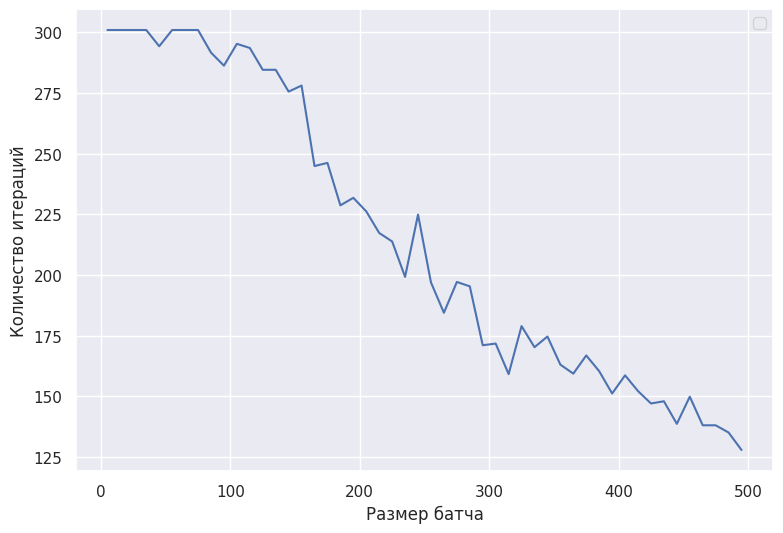

In [38]:
fig, ax = plt.subplots(figsize=(9, 6))
ax.plot(batch_sizes, batch_iter)

ax.set_xlabel("Размер батча")
ax.set_ylabel("Количество итераций")
ax.legend()

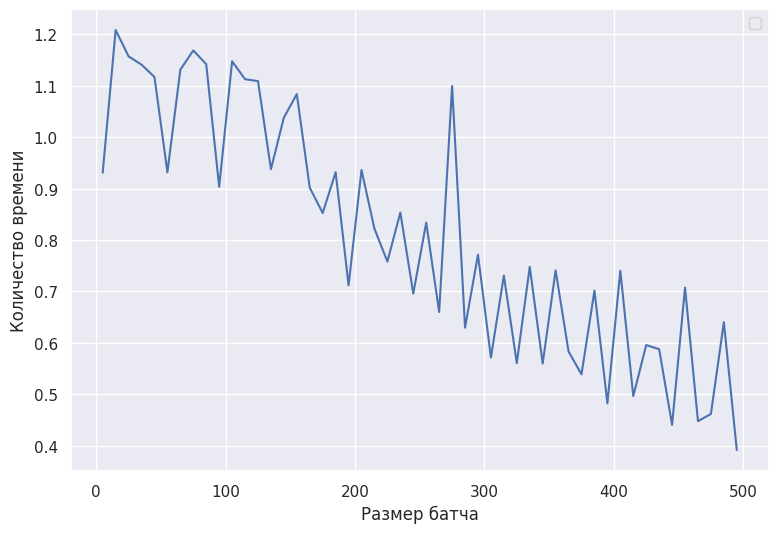

In [39]:
fig, ax = plt.subplots(figsize=(9, 6))
ax.plot(batch_sizes, batch_time)

ax.set_xlabel("Размер батча")
ax.set_ylabel("Количество времени")
ax.legend()

Чем больше батч, тем лучше. Тем меньше тратится итераций и времени. Соответсвенно лучше всего - использовать полный градиентный спуск. Однако, важно отметить, что это верно для этой конкретной задачи, но не в целом. Вероятно, если брать функции с более сложно вычисляемым градиентом, то мы увидим иную динамику.

## Задание 7. Регуляризация (1 балл)

В этом задании вам предстоит исследовать влияние регуляризации на работу различных методов градиентного спуска. Напомним, регуляризация - это добавка к функции потерь, которая штрафует за норму весов. Мы будем использовать l2 регуляризацию, таким образом функция потерь приобретает следующий вид:

$$
    Q(w) = \dfrac{1}{\ell} \sum\limits_{i=1}^{\ell} (a_w(x_i) - y_i)^2 + \dfrac{\mu}{2} \| w \|^2
$$

Допишите класс **BaseDescentReg** в файле `descents.py`.

Протестируйте ваше решение в контесте.

Вставьте ссылку на успешную посылку:

* **BaseDescentReg**: https://contest.yandex.ru/contest/70588/run-report/124756067/

Найдите лучшие параметры обучения с регуляризацией аналогично 5 заданию. Будем подбирать длину шага $\lambda$ (`lambda_`) и коэффициент регуляризации $\mu$ (`mu`).

Сравните для каждого метода результаты с регуляризацией и без регуляризации (нужно опять сохранить ошибку и качество по метрике $R^2$ на обучающей и тестовой выборках и количество итераций до сходимости).

Постройте для каждого метода график со значениями функции потерь MSE с регуляризацией и без регуляризации (всего должно получиться 4 графика).

Посмотрите на получившиеся результаты. Какие можно сделать выводы, как регуляризация влияет на сходимость? Как изменилось качество на обучающей выборке? На тестовой? Чем вы можете объяснить это?

In [40]:
lambdas = np.logspace(-5, 2, 10)
alphas = np.logspace(-3, 3, 10)

best_full = np.inf
best_stochastic = np.inf
best_momentum = np.inf
best_adam = np.inf
lambda_full_reg = 0
lambda_stochastic_reg = 0
lambda_momentum_reg = 0
lambda_adam_reg = 0
alpha_full = 0
alpha_stochastic = 0
alpha_momentum = 0
alpha_adam = 0


for lambda_ in lambdas:
  for alpha_ in alphas:
    model = LinearRegression({'descent_name' : 'full', 'regularized':True, 'kwargs' : {'dimension' : x_train.shape[1], 'lambda_' : lambda_, 'mu' : alpha_}})
    model.fit(x_train, y_train)
    err = model.calc_loss(x_val, y_val)
    if err < best_full:
      best_full = err
      lambda_full_reg = lambda_
      alpha_full = alpha_

    model = LinearRegression({'descent_name' : 'stochastic', 'regularized':True, 'kwargs' : {'dimension' : x_train.shape[1], 'lambda_' : lambda_, 'mu' : alpha_}})
    model.fit(x_train, y_train)
    err = model.calc_loss(x_val, y_val)
    if err < best_stochastic:
      best_stochastic = err
      lambda_stochastic_reg = lambda_
      alpha_stochastic = alpha_

    model = LinearRegression({'descent_name' : 'momentum', 'regularized':True,  'kwargs' : {'dimension' : x_train.shape[1], 'lambda_' : lambda_, 'mu' : alpha_}})
    model.fit(x_train, y_train)
    err = model.calc_loss(x_val, y_val)
    if err < best_momentum:
      best_momentum = err
      lambda_momentum_reg = lambda_
      alpha_momentum = alpha_

    model = LinearRegression({'descent_name' : 'adam', 'regularized':True, 'kwargs' : {'dimension' : x_train.shape[1], 'lambda_' : lambda_, 'mu' : alpha_}})
    model.fit(x_train, y_train)
    err = model.calc_loss(x_val, y_val)
    if err < best_adam:
      best_adam = err
      lambda_adam_reg = lambda_
      alpha_adam = alpha_

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/content/descents.py:216: RuntimeWarning: overflow encountered in multiply
  return super().calc_gradient(x, y) + l2_gradient * self.mu
/content/descents.py:216: RuntimeWarning: invalid value encountered in add
  return super().calc_gradient(x, y) + l2_gradient * self.mu
/content/descents.py:159: RuntimeWarning: invalid value encountered in add
  self.h = self.alpha * self.h + self.lr() * gradient
/content/descents.py:108: RuntimeWarning: overflow encountered in multiply
  diff = -self.lr() * gradient


In [41]:
model_full = LinearRegression({'descent_name' : 'full', 'kwargs' : {'dimension' : x_train.shape[1], 'lambda_' : lambda_full}})
model_stochastic = LinearRegression({'descent_name' : 'stochastic', 'kwargs' : {'dimension' : x_train.shape[1], 'lambda_' : lambda_stochastic}})
model_momentum = LinearRegression({'descent_name' : 'momentum',  'kwargs' : {'dimension' : x_train.shape[1], 'lambda_' : lambda_momentum}})
model_adam = LinearRegression({'descent_name' : 'adam', 'kwargs' : {'dimension' : x_train.shape[1], 'lambda_' : lambda_adam}})

model_full_reg = LinearRegression({'descent_name' : 'full', 'regularized':True, 'kwargs' : {'dimension' : x_train.shape[1], 'lambda_' : lambda_full_reg, 'mu' : alpha_full}})
model_stochastic_reg = LinearRegression({'descent_name' : 'stochastic', 'regularized':True, 'kwargs' : {'dimension' : x_train.shape[1], 'lambda_' : lambda_stochastic_reg, 'mu' : alpha_stochastic}})
model_momentum_reg = LinearRegression({'descent_name' : 'momentum', 'regularized':True,  'kwargs' : {'dimension' : x_train.shape[1], 'lambda_' : lambda_momentum_reg, 'mu' : alpha_momentum}})
model_adam_reg = LinearRegression({'descent_name' : 'adam', 'regularized':True, 'kwargs' : {'dimension' : x_train.shape[1], 'lambda_' : lambda_adam_reg, 'mu' : alpha_adam}})

model_full.fit(x_train, y_train)
model_stochastic.fit(x_train, y_train)
model_momentum.fit(x_train, y_train)
model_adam.fit(x_train, y_train)

model_full_reg.fit(x_train, y_train)
model_stochastic_reg.fit(x_train, y_train)
model_momentum_reg.fit(x_train, y_train)
model_adam_reg.fit(x_train, y_train)

print("MSE_TRAIN_FULL:", model_full_reg.calc_loss(x_train, y_train))
print("MSE_TEST_FULL:", model_full_reg.calc_loss(x_test, y_test))
print("RSS_TRAIN_FULL_LOG:", calc_rss(x_train, y_train, model_full_reg))
print("RSS_TEST_FULL_LOG:", calc_rss(x_test, y_test, model_full_reg))
print("RSS_TRAIN_FULL:", calc_rss_log(x_train, y_train, model_full_reg))
print("RSS_TEST_FULL:", calc_rss_log(x_test, y_test, model_full_reg))
print()
print("MSE_TRAIN_STOC:", model_stochastic_reg.calc_loss(x_train, y_train))
print("MSE_TEST_STOC:", model_stochastic_reg.calc_loss(x_test, y_test))
print("RSS_TRAIN_STOC_LOG:", calc_rss(x_train, y_train, model_stochastic_reg))
print("RSS_TEST_STOC_LOG:", calc_rss(x_test, y_test, model_stochastic_reg))
print("RSS_TRAIN_STOC:", calc_rss_log(x_train, y_train, model_stochastic_reg))
print("RSS_TEST_STOC:", calc_rss_log(x_test, y_test, model_stochastic_reg))
print()
print("MSE_TRAIN_MOMENTUM:", model_momentum_reg.calc_loss(x_train, y_train))
print("MSE_TEST_MOMENTUM:", model_momentum_reg.calc_loss(x_test, y_test))
print("RSS_TRAIN_MOMENTUM_LOG:", calc_rss(x_train, y_train, model_momentum_reg))
print("RSS_TEST_MOMENTUM_LOG:", calc_rss(x_test, y_test, model_momentum_reg))
print("RSS_TRAIN_MOMENTUM:", calc_rss_log(x_train, y_train, model_momentum_reg))
print("RSS_TEST_MOMENTUM:", calc_rss_log(x_test, y_test, model_momentum_reg))
print()
print("MSE_TRAIN_ADAM:", model_adam_reg.calc_loss(x_train, y_train))
print("MSE_TEST_ADAM:", model_adam_reg.calc_loss(x_test, y_test))
print("RSS_TRAIN_ADAM_LOG:", calc_rss(x_train, y_train, model_adam_reg))
print("RSS_TEST_ADAM_LOG:", calc_rss(x_test, y_test, model_adam_reg))
print("RSS_TRAIN_ADAM:", calc_rss_log(x_train, y_train, model_adam_reg))
print("RSS_TEST_ADAM:", calc_rss_log(x_test, y_test, model_adam_reg))

MSE_TRAIN_FULL: 0.34146645452216495
MSE_TEST_FULL: 0.3519418886696921
RSS_TRAIN_FULL_LOG: 0.7273877565254134
RSS_TEST_FULL_LOG: 0.7243331884662911
RSS_TRAIN_FULL: 0.43927334415855535
RSS_TEST_FULL: 0.4865995094298554

MSE_TRAIN_STOC: 0.5766599551455159
MSE_TEST_STOC: 0.5801588360748184
RSS_TRAIN_STOC_LOG: 0.5396193037053679
RSS_TEST_STOC_LOG: 0.5455768646114405
RSS_TRAIN_STOC: 0.026935354548844548
RSS_TEST_STOC: 0.1962933580904972

MSE_TRAIN_MOMENTUM: 0.280121403375136
MSE_TEST_MOMENTUM: 0.29639218834486963
RSS_TRAIN_MOMENTUM_LOG: 0.7763630271494544
RSS_TEST_MOMENTUM_LOG: 0.767843805597089
RSS_TRAIN_MOMENTUM: 0.321718376195647
RSS_TEST_MOMENTUM: 0.374793303171685

MSE_TRAIN_ADAM: 0.2772500716925393
MSE_TEST_ADAM: 0.29134656194243824
RSS_TRAIN_ADAM_LOG: 0.7786553758161711
RSS_TEST_ADAM_LOG: 0.7717959118604442
RSS_TRAIN_ADAM: 0.3813080454540423
RSS_TEST_ADAM: 0.4363600979710496


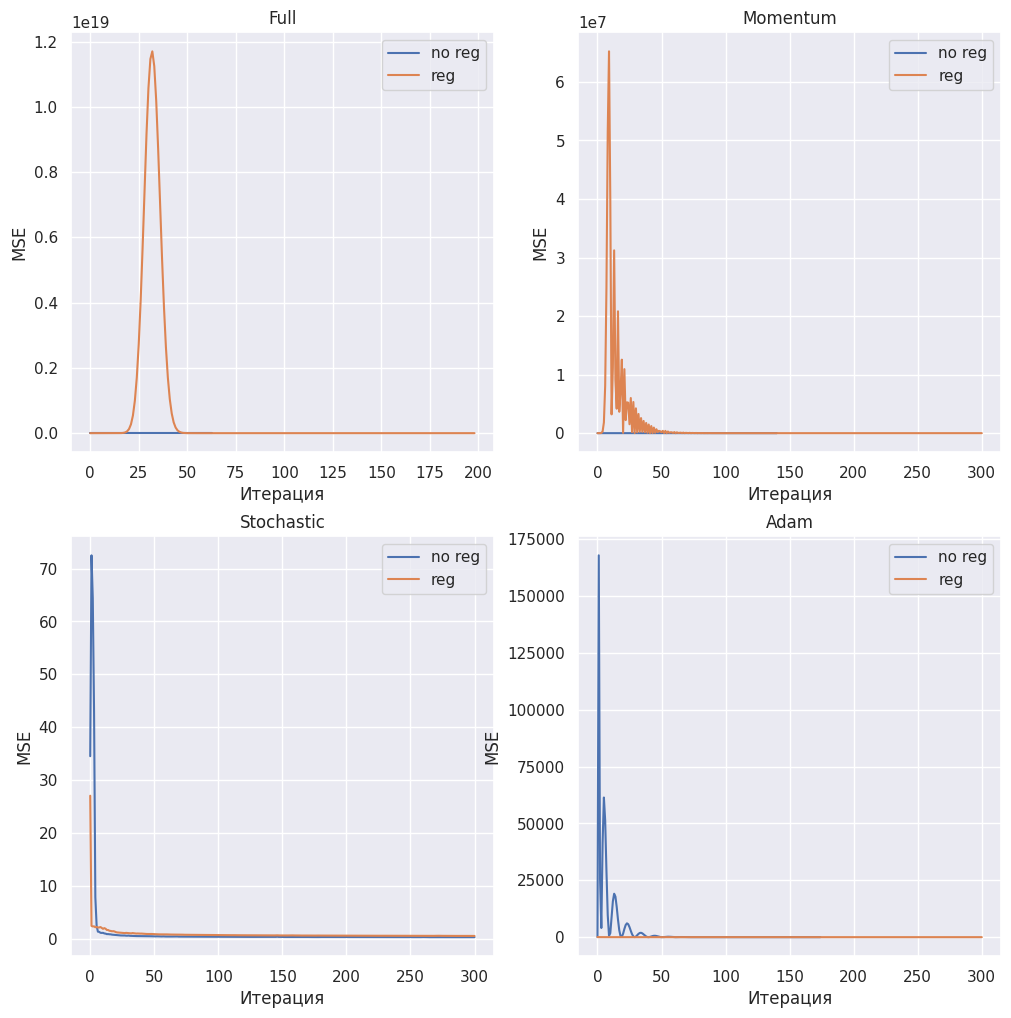

In [42]:
fig, axes = plt.subplots(2, 2, figsize=(12, 12))
axes[0,0].plot(model_full.loss_history, label = 'no reg')
axes[0,0].plot(model_full_reg.loss_history, label = 'reg')
axes[1,0].plot(model_stochastic.loss_history, label = 'no reg')
axes[1,0].plot(model_stochastic_reg.loss_history, label = 'reg')
axes[0,1].plot(model_momentum.loss_history, label = 'no reg')
axes[0,1].plot(model_momentum_reg.loss_history, label = 'reg')
axes[1,1].plot(model_adam.loss_history, label = 'no reg')
axes[1,1].plot(model_adam_reg.loss_history, label = 'reg')

axes[0,0].set_title("Full")
axes[1,0].set_title("Stochastic")
axes[0,1].set_title("Momentum")
axes[1,1].set_title("Adam")

axes[0,0].set_xlabel("Итерация")
axes[0,1].set_xlabel("Итерация")
axes[1,0].set_xlabel("Итерация")
axes[1,1].set_xlabel("Итерация")
axes[0,0].set_ylabel("MSE")
axes[1,0].set_ylabel("MSE")
axes[0,1].set_ylabel("MSE")
axes[1,1].set_ylabel("MSE")

axes[0,0].legend()
axes[0,1].legend()
axes[1,0].legend()
axes[1,1].legend()

Сначала про качество. Для всех, кроме стохастики, оно незначительно просело для логарифма переменной и существенно выросло для её экспоненты. Сходимость улучшилась только для Adam. Для остальных неодназначно.

Объяснить такую сходимость можно внесением "шума" от регуляризации функция приобритает более сложную форму.

Объяснить качество можно следующим образом. Так как мы изначально угадывали лишь порядок, то регуляризация сильно не улучшила результат на тестовой выборке. С другой стороны, видимо она действительно снизила переобучение, за счет чего выросло качество на изначальной переменной.

## Задание 8. Альтернативная функция потерь (1 балл)

В этом задании вам предстоит использовать другую функцию потерь для нашей задачи регрессии. В качестве функции потерь мы выбрали **Log-Cosh**:

$$
    L(y, a)
    =
    \log\left(\cosh(a - y)\right).
$$

Самостоятельно продифференцируйте данную функцию потерь чтобы найти её градиент _(требуется показать не только результат, но и промежуточные вычисления)_:

$$\nabla_w LogCosh = \dfrac{1}{\ell}\sum_{i=1}^\ell \nabla_{ch (x^{(i)}w - y)}ln(ch (x^{(i)}w - y)) * \nabla_{x^{(i)}w - y} ch (x^{(i)}w - y) * \nabla_{w}x^{(i)}w - y = \dfrac{1}{\ell}\sum_{i=1}^\ell \dfrac{sh(x^{(i)}w - y)}{ch (x^{(i)}w - y)}x^{(i)} = \dfrac{1}{\ell}\sum_{i=1}^\ell th(x^{(i)}w - y)x^{(i)} = \dfrac{1}{\ell}\sum_{i=1}^\ell x^T_{(i)} th(xw - y)^{(i)} = \dfrac{1}{\ell} X^Tth(Xw - y)$$

Программно реализуйте градиентный спуск с данной функцией потерь в файле `descents.py`, обучите все четыре метода (без регуляризации) аналогично 5 заданию, сравните их качество с четырьмя методами из 5 задания.

Пример того, как можно запрограммировать использование нескольких функций потерь внутри одного класса градиентного спуска:


```python
from enum import auto
from enum import Enum

import numpy as np

class LossFunction(Enum):
    MSE = auto()
    MAE = auto()
    LogCosh = auto()
    Huber = auto()

...
class BaseDescent:
    def __init__(self, loss_function: LossFunction = LossFunction.MSE):
        self.loss_function: LossFunction = loss_function

    def calc_gradient(self, x: np.ndarray, y: np.ndarray) -> np.ndarray:
        if self.loss_function is LossFunction.MSE:
            return ...
        elif self.loss_function is LossFunction.LogCosh:
            return ...
...

```

In [49]:
import descents
lambdas = np.logspace(-8, 2, 30)

best_full = np.inf
best_stochastic = np.inf
best_momentum = np.inf
best_adam = np.inf
lambda_full_kosh = 0
lambda_stochastic_kosh = 0
lambda_momentum_kosh = 0
lambda_adam_kosh = 0

for lambda_ in lambdas:
  model = LinearRegression({'descent_name' : 'full', 'kwargs' : {'dimension' : x_train.shape[1], 'lambda_' : lambda_, 'loss_function' : descents.LossFunction.LogCosh}})
  model.fit(x_train, y_train)
  err = model.calc_loss(x_val, y_val)
  if err < best_full:
    best_full = err
    lambda_full_kosh = lambda_

  model = LinearRegression({'descent_name' : 'stochastic', 'kwargs' : {'dimension' : x_train.shape[1], 'lambda_' : lambda_, 'loss_function' : descents.LossFunction.LogCosh}})
  model.fit(x_train, y_train)
  err = model.calc_loss(x_val, y_val)
  if err < best_stochastic:
    best_stochastic = err
    lambda_stochastic_kosh = lambda_

  model = LinearRegression({'descent_name' : 'momentum',  'kwargs' : {'dimension' : x_train.shape[1], 'lambda_' : lambda_, 'loss_function' : descents.LossFunction.LogCosh}})
  model.fit(x_train, y_train)
  err = model.calc_loss(x_val, y_val)
  if err < best_momentum:
    best_momentum = err
    lambda_momentum_kosh = lambda_

  model = LinearRegression({'descent_name' : 'adam', 'kwargs' : {'dimension' : x_train.shape[1], 'lambda_' : lambda_, 'loss_function' : descents.LossFunction.LogCosh}})
  model.fit(x_train, y_train)
  err = model.calc_loss(x_val, y_val)
  if err < best_adam:
    best_adam = err
    lambda_adam_kosh = lambda_

/content/descents.py:83: RuntimeWarning: overflow encountered in cosh
  diff = np.ln(np.cosh(self.predict(x) - y))


In [55]:
model_full = LinearRegression({'descent_name' : 'full', 'kwargs' : {'dimension' : x_train.shape[1], 'lambda_' : lambda_full_kosh, 'loss_function' : descents.LossFunction.LogCosh}})
model_stochastic = LinearRegression({'descent_name' : 'stochastic', 'kwargs' : {'dimension' : x_train.shape[1], 'lambda_' : lambda_stochastic_kosh, 'loss_function' : descents.LossFunction.LogCosh}})
model_momentum = LinearRegression({'descent_name' : 'momentum',  'kwargs' : {'dimension' : x_train.shape[1], 'lambda_' : lambda_momentum_kosh, 'loss_function' : descents.LossFunction.LogCosh}})
model_adam = LinearRegression({'descent_name' : 'adam', 'kwargs' : {'dimension' : x_train.shape[1], 'lambda_' : lambda_adam_kosh, 'loss_function' : descents.LossFunction.LogCosh}})

model_full.fit(x_train, y_train)
model_stochastic.fit(x_train, y_train)
model_momentum.fit(x_train, y_train)
model_adam.fit(x_train, y_train)

def calc_rss(x, y, model): # RSS по лог. целевой переменной
  TSS = (y - np.mean(y))@(y - np.mean(y))
  d = (model.predict(x) - y)
  RSS = d.T @ d
  return 1 - RSS/TSS

def calc_rss_log(x, y, model): # RSS по целевой переменной
  exp_y = np.expm1(y)
  TSS = (exp_y - np.mean(exp_y))@(exp_y - np.mean(exp_y))
  d = (np.expm1(model.predict(x)) - exp_y)
  RSS = d.T @ d
  return 1 - RSS/TSS


print("LOGCOSH_TRAIN_FULL:", model_full.calc_loss(x_train, y_train))
print("LOGCOSH_TEST_FULL:", model_full.calc_loss(x_test, y_test))
print("RSS_TRAIN_FULL_LOG:", calc_rss(x_train, y_train, model_full))
print("RSS_TEST_FULL_LOG:", calc_rss(x_test, y_test, model_full))
print("RSS_TRAIN_FULL:", calc_rss_log(x_train, y_train, model_full))
print("RSS_TEST_FULL:", calc_rss_log(x_test, y_test, model_full))
print()
print("LOGCOSH_TRAIN_STOC:", model_stochastic.calc_loss(x_train, y_train))
print("LOGCOSH_TEST_STOC:", model_stochastic.calc_loss(x_test, y_test))
print("RSS_TRAIN_STOC_LOG:", calc_rss(x_train, y_train, model_stochastic))
print("RSS_TEST_STOC_LOG:", calc_rss(x_test, y_test, model_stochastic))
print("RSS_TRAIN_STOC:", calc_rss_log(x_train, y_train, model_stochastic))
print("RSS_TEST_STOC:", calc_rss_log(x_test, y_test, model_stochastic))
print()
print("LOGCOSH_TRAIN_MOMENTUM:", model_momentum.calc_loss(x_train, y_train))
print("LOGCOSH_TEST_MOMENTUM:", model_momentum.calc_loss(x_test, y_test))
print("RSS_TRAIN_MOMENTUM_LOG:", calc_rss(x_train, y_train, model_momentum))
print("RSS_TEST_MOMENTUM_LOG:", calc_rss(x_test, y_test, model_momentum))
print("RSS_TRAIN_MOMENTUM:", calc_rss_log(x_train, y_train, model_momentum))
print("RSS_TEST_MOMENTUM:", calc_rss_log(x_test, y_test, model_momentum))
print()
print("LOGCOSH_TRAIN_ADAM:", model_adam.calc_loss(x_train, y_train))
print("LOGCOSH_TEST_ADAM:", model_adam.calc_loss(x_test, y_test))
print("RSS_TRAIN_ADAM_LOG:", calc_rss(x_train, y_train, model_adam))
print("RSS_TEST_ADAM_LOG:", calc_rss(x_test, y_test, model_adam))
print("RSS_TRAIN_ADAM:", calc_rss_log(x_train, y_train, model_adam))
print("RSS_TEST_ADAM:", calc_rss_log(x_test, y_test, model_adam))

LOGCOSH_TRAIN_FULL: 0.12431398292025332
LOGCOSH_TEST_FULL: 0.12647639560778987
RSS_TRAIN_FULL_LOG: 0.7357495753459966
RSS_TEST_FULL_LOG: 0.7289852205516333
RSS_TRAIN_FULL: 0.46003471647591854
RSS_TEST_FULL: 0.48908648107597086

LOGCOSH_TRAIN_STOC: 0.1259905078332318
LOGCOSH_TEST_STOC: 0.12888386114181016
RSS_TRAIN_STOC_LOG: 0.7198565306610478
RSS_TEST_STOC_LOG: 0.7086997099994583
RSS_TRAIN_STOC: 0.19463740866524892
RSS_TEST_STOC: 0.01566898552495355

LOGCOSH_TRAIN_MOMENTUM: 0.10589936293038985
LOGCOSH_TEST_MOMENTUM: 0.1077424955406263
RSS_TRAIN_MOMENTUM_LOG: 0.7782195636694633
RSS_TEST_MOMENTUM_LOG: 0.7728582823153539
RSS_TRAIN_MOMENTUM: 0.5001477532902971
RSS_TEST_MOMENTUM: 0.5404716221002912

LOGCOSH_TRAIN_ADAM: 0.11671540147784236
LOGCOSH_TEST_ADAM: 0.11791698058736032
RSS_TRAIN_ADAM_LOG: 0.7514253473435142
RSS_TEST_ADAM_LOG: 0.7483869175919953
RSS_TRAIN_ADAM: -0.8065528059455571
RSS_TEST_ADAM: -0.6176515386159616


Качество на лог. выросло на : стохастике.
Качество на восстановленной: полном и моменте.




### Кулинарно-социализационный бонус. (0.5 балла).

Как мы знаем, осень прекрасная пора, время пробовать новое и делиться теплом с друзьями и близкими. Выберите рецепт, который соответствует вашему настроению, приготовьте выбранное блюдо и угостите хотя бы одного человека им. Кратко опишите ваши впечатления, прикрепите рецепт и фотографии блюда и довольного гостя.

> Я это приготовил этим летом, привез с собой в общагу пару баночек. Блюдо напоминает мне о моей родине, отдает плотным настроением морского дна.

>Важно, юзаемое создание в красной книге - добыча запрещена. Однако есть легальные "фермы", которые их разводят, так что берем исключительно там.


# Трепанг на меду или дары Ктулху
1. Походите по деревням Приморского края, и найдите разводчика вот таких существ : 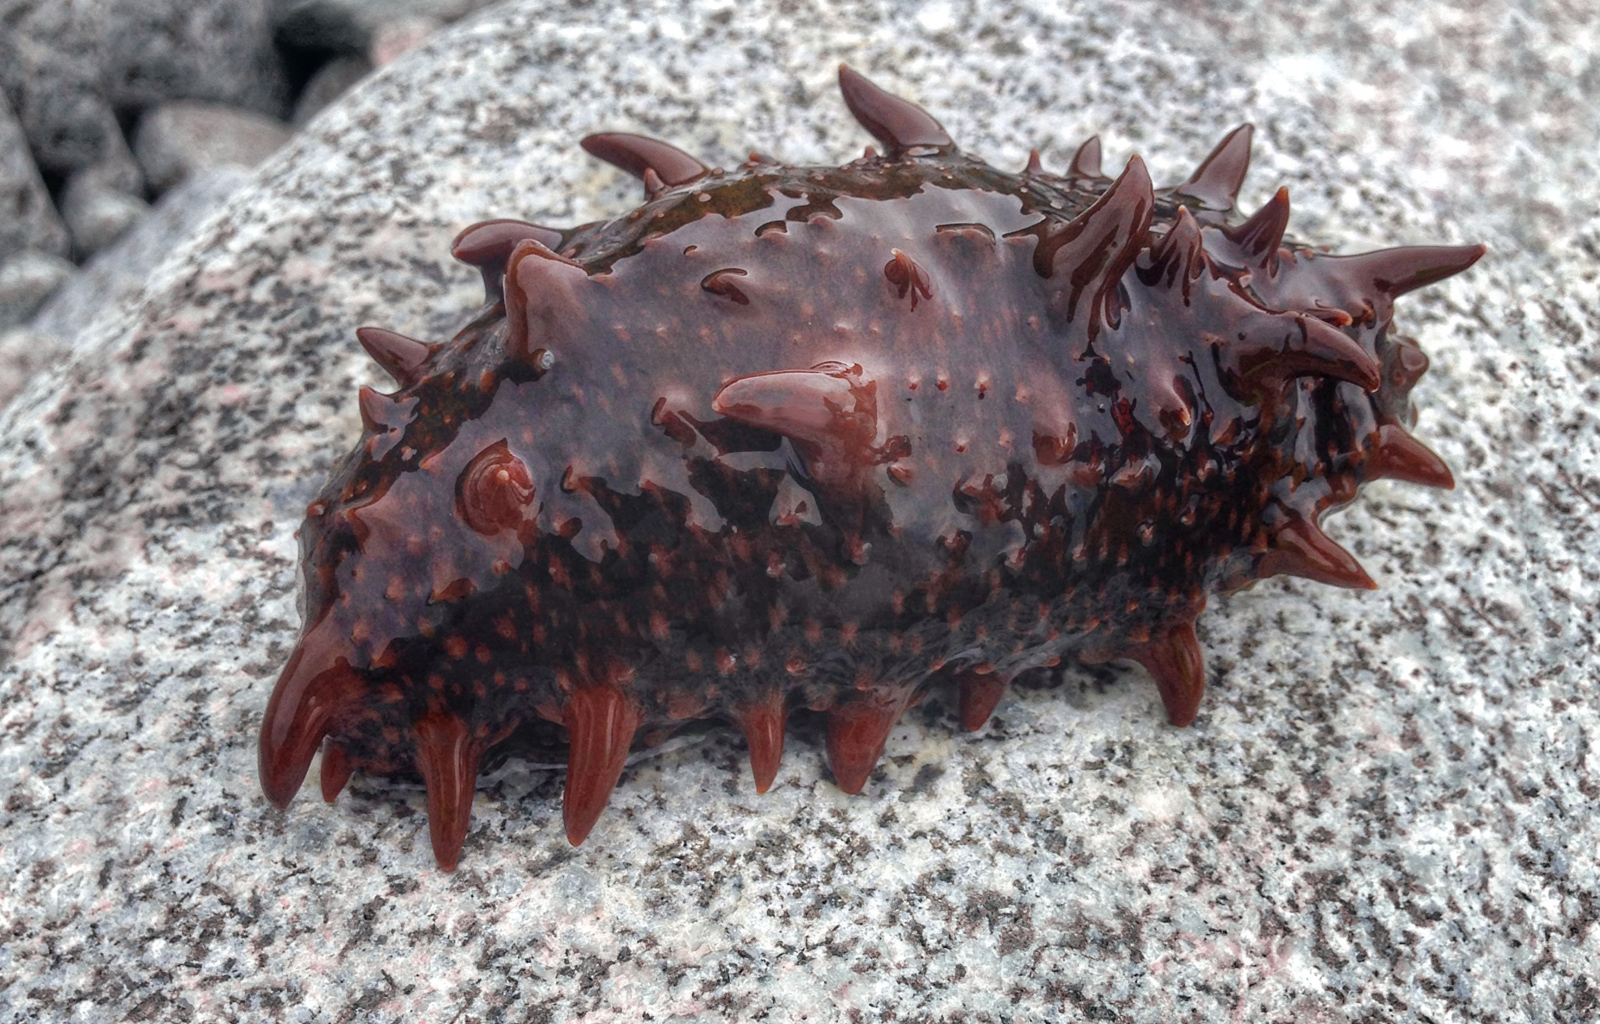

2. Приобритите образец существа у него в высушенном виде
3. Залейте это мёдом (я юзал липовый, а так можно любой)
4. Ждем месяц, параллельно молимся древним богам.
5. ???
6. Древние выдать вам жабры и жена из Инсмута (aka Большой камень).
Фотография неофита:

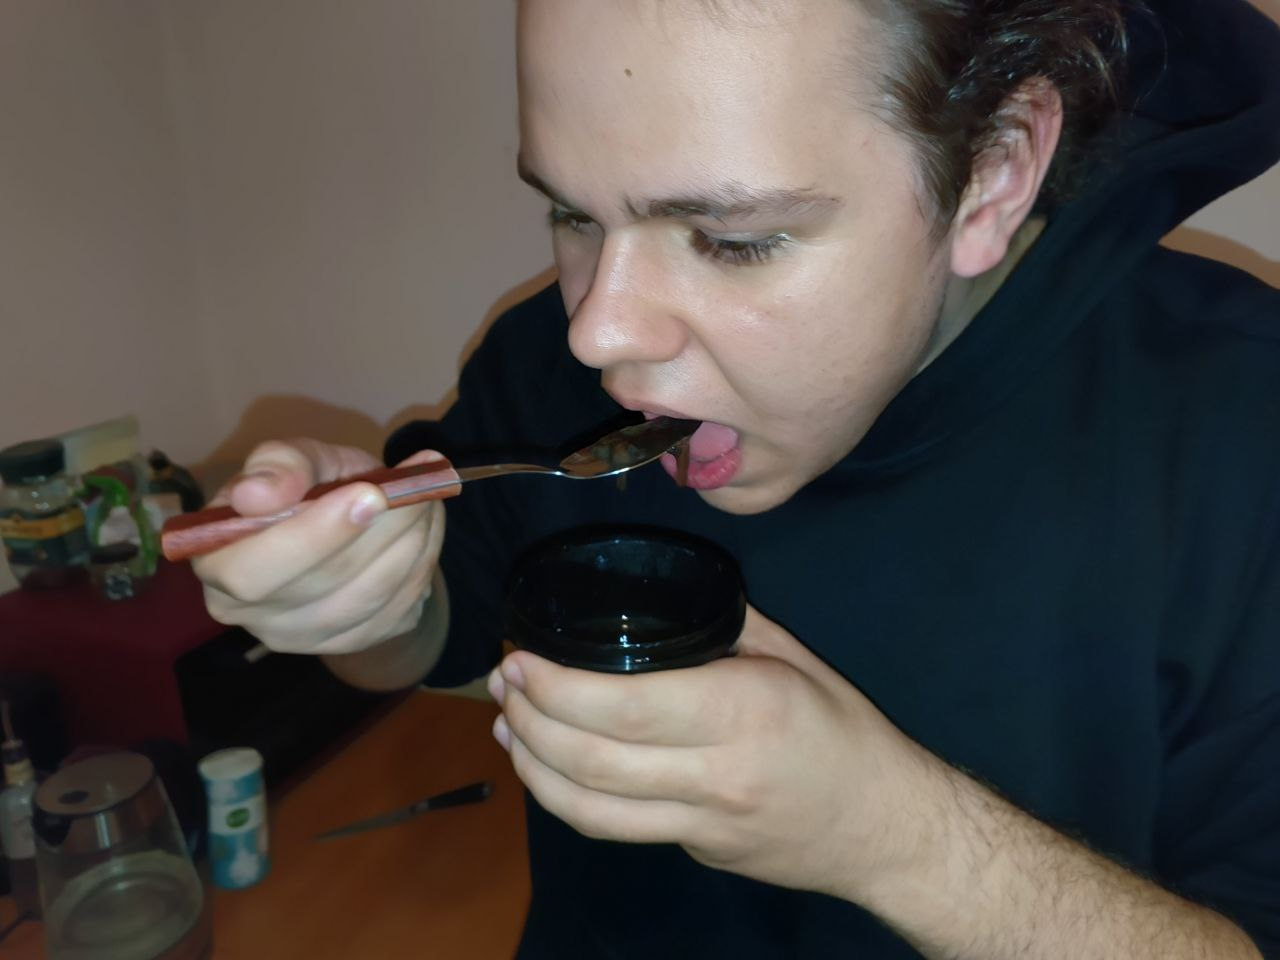

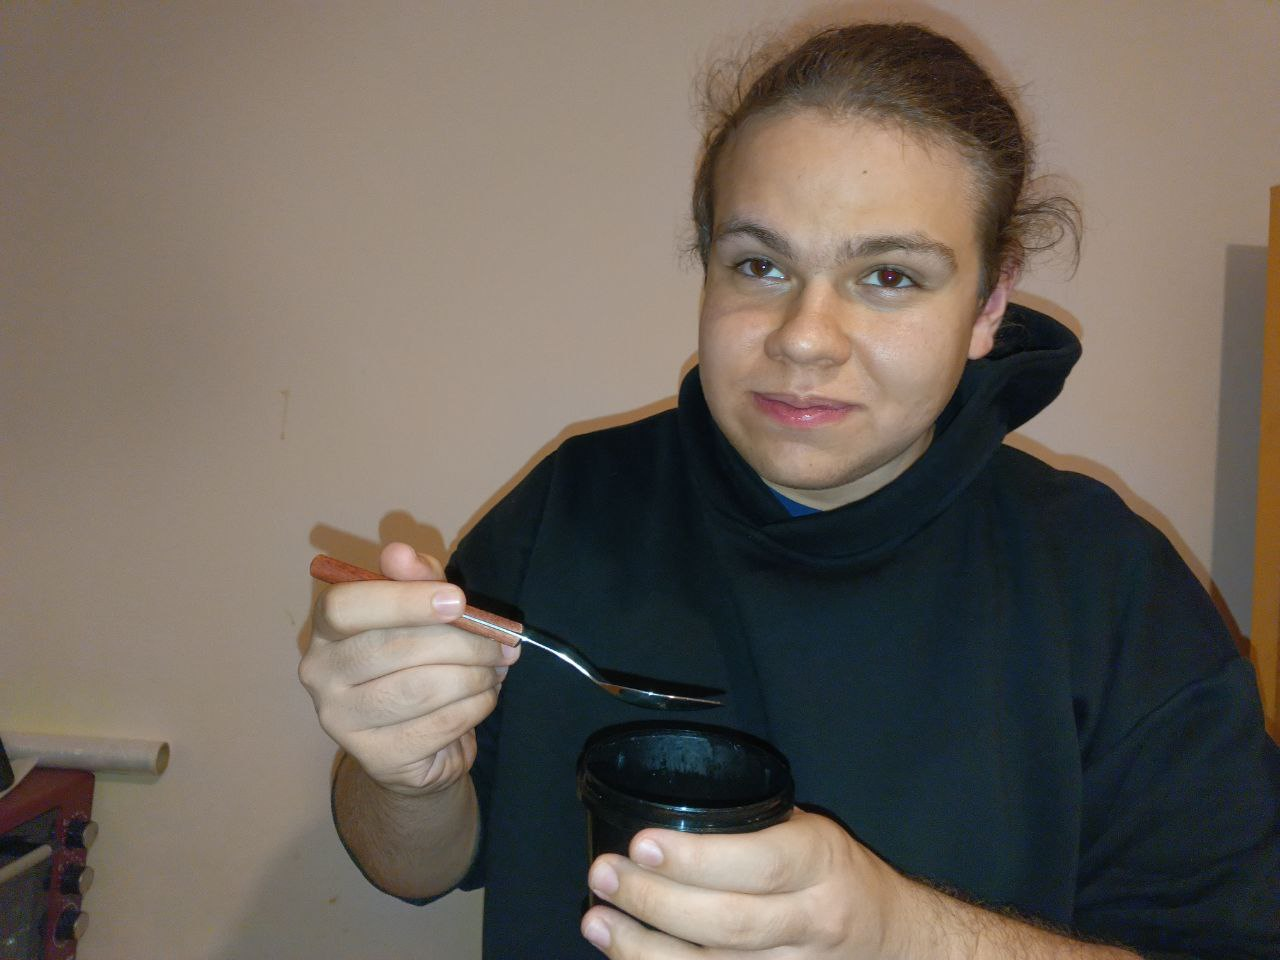

### Бонус 1. Другие методы градиентного спуска (1 балл).

По желанию выберите метод градиентного спуска из следующего списка и самостоятельно реализуйте его в файле `descents.py`. Обучите линейную регрессию с помощью этого метода, сравните с методами из основной части домашнего задания.

`AdaMax` (вариация Adam основанная на $l_{\infty}$), `Nadam` (вариация Adam совмещенная с методом импульса Нестерова), `AMSGrad` (ещё одна вариация Adam).

In [52]:
lambdas = np.logspace(-8, 2, 30)

best_adamax = np.inf
lambda_adamax = 0

for lambda_ in lambdas:
  model = LinearRegression({'descent_name' : 'adamax', 'kwargs' : {'dimension' : x_train.shape[1], 'lambda_' : lambda_}})
  model.fit(x_train, y_train)
  err = model.calc_loss(x_val, y_val)
  if err < best_adamax:
    best_adamax = err
    lambda_adamax = lambda_

In [53]:
model_adamax = LinearRegression({'descent_name' : 'adamax', 'kwargs' : {'dimension' : x_train.shape[1], 'lambda_' : lambda_adamax}})
model_adamax.fit(x_train, y_train)
print("MSE_TRAIN_ADAM:", model_adamax.calc_loss(x_train, y_train))
print("MSE_TEST_ADAM:", model_adamax.calc_loss(x_test, y_test))
print("RSS_TRAIN_ADAM_LOG:", calc_rss(x_train, y_train, model_adamax))
print("RSS_TEST_ADAM_LOG:", calc_rss(x_test, y_test, model_adamax))
print("RSS_TRAIN_ADAM:", calc_rss_log(x_train, y_train, model_adamax))
print("RSS_TEST_ADAM:", calc_rss_log(x_test, y_test, model_adamax))

MSE_TRAIN_ADAM: 0.27003565804534657
MSE_TEST_ADAM: 0.2788278822627338
RSS_TRAIN_ADAM_LOG: 0.7844150557603315
RSS_TEST_ADAM_LOG: 0.7816014639217812
RSS_TRAIN_ADAM: 0.20596302277704615
RSS_TEST_ADAM: 0.2895349941166109


Результат ухудшился по сравнению с обычным Adam, хотя все еще лучше остальных методов.

### Бонус 2. Другие функции потерь (1 балл).

Аналогично 8 заданию реализуйте две функции потерь - **MAE** и **Huber**.

Самостоятельно продифференцируйте данные функции потерь, чтобы найти их градиенты _(требуется показать не только результат, но и промежуточные вычисления)_:

$$d MAE [h]= \dfrac{1}{\ell} \sum_{i=1}^\ell d |X^{(i)}w - y_i|[h] = \dfrac{1}{\ell} \sum_{i=1}^\ell \begin{cases} X^{(i)}h & X^{(i)}w - y_i \geq 0 \\ -X^{(i)}h
\end{cases}$$
$$\nabla_w MAE = \dfrac{1}{\ell} \sum_{i=1}^\ell \begin{cases} X^{(i)} & X^{(i)}w - y_i \geq 0 \\ -X^{(i)}
\end{cases}$$
$$d Huber_{\delta} [h] = \dfrac{1}{\ell} \sum_{i=1}^\ell \begin{cases} d \frac{1}{2}(X^{(i)} w - y_i)^2 [h] & |X^{(i)}w - y_i| \leq \delta \\ d (\delta |X^{(i)}w - y_i| - \frac{\delta^2}{2})[h]  \end{cases} = \dfrac{1}{\ell} \sum_{i=1}^\ell \begin{cases} -X^T(y - Xw) [h] & |X^{(i)}w - y_i| \leq \delta \\ \delta X^{(i)}[h] &  X^{(i)}w - y_i > \delta \\ -\delta X^{(i)}[h] &  X^{(i)}w - y_i < -\delta \end{cases}$$
$$\nabla_w Huber_{\delta} = \dfrac{1}{\ell} \sum_{i=1}^\ell \begin{cases} -X^T(y - Xw) & |X^{(i)}w - y_i| \leq \delta \\ \delta X^{(i)} &  X^{(i)}w - y_i > \delta \\ -\delta X^{(i)} &  X^{(i)}w - y_i < -\delta \end{cases}$$

Программно реализуйте градиентный спуск с данными функциями потерь в файле `descents.py`, обучите все четыре метода (без регуляризации) аналогично 5 заданию, сравните их качество с четырьмя методами из 5 задания.

Сравните между собой *для каждого метода отдельно* качество для разных функций потерь. Какая оказалась лучше? Как вы думаете почему?

In [69]:
lambdas = np.logspace(-8, 5, 30)

best_full = np.inf
best_stochastic = np.inf
best_momentum = np.inf
best_adam = np.inf
lambda_full_mae = 0
lambda_stochastic_mae = 0
lambda_momentum_mae = 0
lambda_adam_mae = 0

for lambda_ in lambdas:
  model = LinearRegression({'descent_name' : 'full', 'kwargs' : {'dimension' : x_train.shape[1], 'lambda_' : lambda_, 'loss_function' : descents.LossFunction.MAE}})
  model.fit(x_train, y_train)
  err = model.calc_loss(x_val, y_val)
  if err < best_full:
    best_full = err
    lambda_full_mae = lambda_

  model = LinearRegression({'descent_name' : 'stochastic', 'kwargs' : {'dimension' : x_train.shape[1], 'lambda_' : lambda_, 'loss_function' : descents.LossFunction.MAE}})
  model.fit(x_train, y_train)
  err = model.calc_loss(x_val, y_val)
  if err < best_stochastic:
    best_stochastic = err
    lambda_stochastic_mae = lambda_

  model = LinearRegression({'descent_name' : 'momentum',  'kwargs' : {'dimension' : x_train.shape[1], 'lambda_' : lambda_, 'loss_function' : descents.LossFunction.MAE}})
  model.fit(x_train, y_train)
  err = model.calc_loss(x_val, y_val)
  if err < best_momentum:
    best_momentum = err
    lambda_momentum_mae = lambda_

  model = LinearRegression({'descent_name' : 'adam', 'kwargs' : {'dimension' : x_train.shape[1], 'lambda_' : lambda_, 'loss_function' : descents.LossFunction.MAE}})
  model.fit(x_train, y_train)
  err = model.calc_loss(x_val, y_val)
  if err < best_adam:
    best_adam = err
    lambda_adam_mae = lambda_

In [70]:
model_full = LinearRegression({'descent_name' : 'full', 'kwargs' : {'dimension' : x_train.shape[1], 'lambda_' : lambda_full_mae, 'loss_function' : descents.LossFunction.MAE}})
model_stochastic = LinearRegression({'descent_name' : 'stochastic', 'kwargs' : {'dimension' : x_train.shape[1], 'lambda_' : lambda_stochastic_mae, 'loss_function' : descents.LossFunction.MAE}})
model_momentum = LinearRegression({'descent_name' : 'momentum',  'kwargs' : {'dimension' : x_train.shape[1], 'lambda_' : lambda_momentum_mae, 'loss_function' : descents.LossFunction.MAE}})
model_adam = LinearRegression({'descent_name' : 'adam', 'kwargs' : {'dimension' : x_train.shape[1], 'lambda_' : lambda_adam_mae, 'loss_function' : descents.LossFunction.MAE}})

model_full.fit(x_train, y_train)
model_stochastic.fit(x_train, y_train)
model_momentum.fit(x_train, y_train)
model_adam.fit(x_train, y_train)

def calc_rss(x, y, model): # RSS по лог. целевой переменной
  TSS = (y - np.mean(y))@(y - np.mean(y))
  d = (model.predict(x) - y)
  RSS = d.T @ d
  return 1 - RSS/TSS

def calc_rss_log(x, y, model): # RSS по целевой переменной
  exp_y = np.expm1(y)
  TSS = (exp_y - np.mean(exp_y))@(exp_y - np.mean(exp_y))
  d = (np.expm1(model.predict(x)) - exp_y)
  RSS = d.T @ d
  return 1 - RSS/TSS


print("MAE_TRAIN_FULL:", model_full.calc_loss(x_train, y_train))
print("MAE_TEST_FULL:", model_full.calc_loss(x_test, y_test))
print("RSS_TRAIN_FULL_LOG:", calc_rss(x_train, y_train, model_full))
print("RSS_TEST_FULL_LOG:", calc_rss(x_test, y_test, model_full))
print("RSS_TRAIN_FULL:", calc_rss_log(x_train, y_train, model_full))
print("RSS_TEST_FULL:", calc_rss_log(x_test, y_test, model_full))
print()
print("MAE_TRAIN_STOC:", model_stochastic.calc_loss(x_train, y_train))
print("MAE_TEST_STOC:", model_stochastic.calc_loss(x_test, y_test))
print("RSS_TRAIN_STOC_LOG:", calc_rss(x_train, y_train, model_stochastic))
print("RSS_TEST_STOC_LOG:", calc_rss(x_test, y_test, model_stochastic))
print("RSS_TRAIN_STOC:", calc_rss_log(x_train, y_train, model_stochastic))
print("RSS_TEST_STOC:", calc_rss_log(x_test, y_test, model_stochastic))
print()
print("MAE_TRAIN_MOMENTUM:", model_momentum.calc_loss(x_train, y_train))
print("MAE_TEST_MOMENTUM:", model_momentum.calc_loss(x_test, y_test))
print("RSS_TRAIN_MOMENTUM_LOG:", calc_rss(x_train, y_train, model_momentum))
print("RSS_TEST_MOMENTUM_LOG:", calc_rss(x_test, y_test, model_momentum))
print("RSS_TRAIN_MOMENTUM:", calc_rss_log(x_train, y_train, model_momentum))
print("RSS_TEST_MOMENTUM:", calc_rss_log(x_test, y_test, model_momentum))
print()
print("MAE_TRAIN_ADAM:", model_adam.calc_loss(x_train, y_train))
print("MAE_TEST_ADAM:", model_adam.calc_loss(x_test, y_test))
print("RSS_TRAIN_ADAM_LOG:", calc_rss(x_train, y_train, model_adam))
print("RSS_TEST_ADAM_LOG:", calc_rss(x_test, y_test, model_adam))
print("RSS_TRAIN_ADAM:", calc_rss_log(x_train, y_train, model_adam))
print("RSS_TEST_ADAM:", calc_rss_log(x_test, y_test, model_adam))

MAE_TRAIN_FULL: 0.3776566336856162
MAE_TEST_FULL: 0.38074514004508275
RSS_TRAIN_FULL_LOG: 0.7161289766458174
RSS_TEST_FULL_LOG: 0.7060873409580937
RSS_TRAIN_FULL: 0.519066809548612
RSS_TEST_FULL: 0.42935840205086084

MAE_TRAIN_STOC: 0.37632382988838664
MAE_TEST_STOC: 0.3778492216693191
RSS_TRAIN_STOC_LOG: 0.7329272354869832
RSS_TEST_STOC_LOG: 0.7251493853799709
RSS_TRAIN_STOC: 0.5953749933740173
RSS_TEST_STOC: 0.5306101811352328

MAE_TRAIN_MOMENTUM: 0.40244760307222976
MAE_TEST_MOMENTUM: 0.40360517189358774
RSS_TRAIN_MOMENTUM_LOG: 0.71744194632216
RSS_TEST_MOMENTUM_LOG: 0.7103129643817556
RSS_TRAIN_MOMENTUM: -0.31315071720431353
RSS_TEST_MOMENTUM: -0.32741869697770176

MAE_TRAIN_ADAM: 0.33329024306469596
MAE_TEST_ADAM: 0.334432539415578
RSS_TRAIN_ADAM_LOG: 0.7577673956665709
RSS_TEST_ADAM_LOG: 0.7514784602409126
RSS_TRAIN_ADAM: 0.4644782597358995
RSS_TEST_ADAM: 0.6191778963386494


Выросло на лог. переменной: стохастика.
Выросло на переменной: полный, стохастика, адам.

In [66]:
lambdas = np.logspace(-8, 5, 30)

best_full = np.inf
best_stochastic = np.inf
best_momentum = np.inf
best_adam = np.inf
lambda_full_huber = 0
lambda_stochastic_huber = 0
lambda_momentum_huber = 0
lambda_adam_huber = 0

for lambda_ in lambdas:
  model = LinearRegression({'descent_name' : 'full', 'kwargs' : {'dimension' : x_train.shape[1], 'lambda_' : lambda_, 'loss_function' : descents.LossFunction.Huber}})
  model.fit(x_train, y_train)
  err = model.calc_loss(x_val, y_val)
  if err < best_full:
    best_full = err
    lambda_full_huber = lambda_

  model = LinearRegression({'descent_name' : 'stochastic', 'kwargs' : {'dimension' : x_train.shape[1], 'lambda_' : lambda_, 'loss_function' : descents.LossFunction.Huber}})
  model.fit(x_train, y_train)
  err = model.calc_loss(x_val, y_val)
  if err < best_stochastic:
    best_stochastic = err
    lambda_stochastic_huber = lambda_

  model = LinearRegression({'descent_name' : 'momentum',  'kwargs' : {'dimension' : x_train.shape[1], 'lambda_' : lambda_, 'loss_function' : descents.LossFunction.Huber}})
  model.fit(x_train, y_train)
  err = model.calc_loss(x_val, y_val)
  if err < best_momentum:
    best_momentum = err
    lambda_momentum_huber = lambda_

  model = LinearRegression({'descent_name' : 'adam', 'kwargs' : {'dimension' : x_train.shape[1], 'lambda_' : lambda_, 'loss_function' : descents.LossFunction.Huber}})
  model.fit(x_train, y_train)
  err = model.calc_loss(x_val, y_val)
  if err < best_adam:
    best_adam = err
    lambda_adam_huber = lambda_

In [67]:
model_full = LinearRegression({'descent_name' : 'full', 'kwargs' : {'dimension' : x_train.shape[1], 'lambda_' : lambda_full_huber, 'loss_function' : descents.LossFunction.Huber}})
model_stochastic = LinearRegression({'descent_name' : 'stochastic', 'kwargs' : {'dimension' : x_train.shape[1], 'lambda_' : lambda_stochastic_huber, 'loss_function' : descents.LossFunction.Huber}})
model_momentum = LinearRegression({'descent_name' : 'momentum',  'kwargs' : {'dimension' : x_train.shape[1], 'lambda_' : lambda_momentum_huber, 'loss_function' : descents.LossFunction.Huber}})
model_adam = LinearRegression({'descent_name' : 'adam', 'kwargs' : {'dimension' : x_train.shape[1], 'lambda_' : lambda_adam_huber, 'loss_function' : descents.LossFunction.Huber}})

model_full.fit(x_train, y_train)
model_stochastic.fit(x_train, y_train)
model_momentum.fit(x_train, y_train)
model_adam.fit(x_train, y_train)

def calc_rss(x, y, model): # RSS по лог. целевой переменной
  TSS = (y - np.mean(y))@(y - np.mean(y))
  d = (model.predict(x) - y)
  RSS = d.T @ d
  return 1 - RSS/TSS

def calc_rss_log(x, y, model): # RSS по целевой переменной
  exp_y = np.expm1(y)
  TSS = (exp_y - np.mean(exp_y))@(exp_y - np.mean(exp_y))
  d = (np.expm1(model.predict(x)) - exp_y)
  RSS = d.T @ d
  return 1 - RSS/TSS


print("HUBER_TRAIN_FULL:", model_full.calc_loss(x_train, y_train))
print("HUBER_TEST_FULL:", model_full.calc_loss(x_test, y_test))
print("RSS_TRAIN_FULL_LOG:", calc_rss(x_train, y_train, model_full))
print("RSS_TEST_FULL_LOG:", calc_rss(x_test, y_test, model_full))
print("RSS_TRAIN_FULL:", calc_rss_log(x_train, y_train, model_full))
print("RSS_TEST_FULL:", calc_rss_log(x_test, y_test, model_full))
print()
print("HUBER_TRAIN_STOC:", model_stochastic.calc_loss(x_train, y_train))
print("HUBER_TEST_STOC:", model_stochastic.calc_loss(x_test, y_test))
print("RSS_TRAIN_STOC_LOG:", calc_rss(x_train, y_train, model_stochastic))
print("RSS_TEST_STOC_LOG:", calc_rss(x_test, y_test, model_stochastic))
print("RSS_TRAIN_STOC:", calc_rss_log(x_train, y_train, model_stochastic))
print("RSS_TEST_STOC:", calc_rss_log(x_test, y_test, model_stochastic))
print()
print("HUBER_TRAIN_MOMENTUM:", model_momentum.calc_loss(x_train, y_train))
print("HUBER_TEST_MOMENTUM:", model_momentum.calc_loss(x_test, y_test))
print("RSS_TRAIN_MOMENTUM_LOG:", calc_rss(x_train, y_train, model_momentum))
print("RSS_TEST_MOMENTUM_LOG:", calc_rss(x_test, y_test, model_momentum))
print("RSS_TRAIN_MOMENTUM:", calc_rss_log(x_train, y_train, model_momentum))
print("RSS_TEST_MOMENTUM:", calc_rss_log(x_test, y_test, model_momentum))
print()
print("HUBER_TRAIN_ADAM:", model_adam.calc_loss(x_train, y_train))
print("HUBER_TEST_ADAM:", model_adam.calc_loss(x_test, y_test))
print("RSS_TRAIN_ADAM_LOG:", calc_rss(x_train, y_train, model_adam))
print("RSS_TEST_ADAM_LOG:", calc_rss(x_test, y_test, model_adam))
print("RSS_TRAIN_ADAM:", calc_rss_log(x_train, y_train, model_adam))
print("RSS_TEST_ADAM:", calc_rss_log(x_test, y_test, model_adam))

HUBER_TRAIN_FULL: 33141.780346055835
HUBER_TEST_FULL: 4175.999832431768
RSS_TRAIN_FULL_LOG: 0.6842642659818896
RSS_TEST_FULL_LOG: 0.6794191833357801
RSS_TRAIN_FULL: 0.6200157376147755
RSS_TEST_FULL: 0.6146989270926018

HUBER_TRAIN_STOC: 35745.70138702441
HUBER_TEST_STOC: 4481.591730580271
RSS_TRAIN_STOC_LOG: 0.6263170098803882
RSS_TEST_STOC_LOG: 0.6221017620981568
RSS_TRAIN_STOC: 0.5912541960485704
RSS_TEST_STOC: 0.5852441143449312

HUBER_TRAIN_MOMENTUM: 49562.03244942668
HUBER_TEST_MOMENTUM: 6217.273838563257
RSS_TRAIN_MOMENTUM_LOG: 0.7496923883130449
RSS_TEST_MOMENTUM_LOG: 0.7392497537222955
RSS_TRAIN_MOMENTUM: 0.6586884891637208
RSS_TEST_MOMENTUM: 0.6678223306525674

HUBER_TRAIN_ADAM: 89094.69730019882
HUBER_TEST_ADAM: 11164.948449430343
RSS_TRAIN_ADAM_LOG: 0.472913985666381
RSS_TEST_ADAM_LOG: 0.4800464686352328
RSS_TRAIN_ADAM: -9.46757508778676
RSS_TEST_ADAM: -9.567270250251317


Игнорируем небольшой хаос на Адаме, посмотрим только на качество логарифма:
Качество упало по сравнению с стандартной MSE.